<a href="https://colab.research.google.com/github/alcarvalhox/inteligencia_vagoes/blob/main/Vagoes_sktime.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Carrega Biliotecas

In [2]:
pip install catboost -q

     |████████████████████████████████| 76.6 MB 84 kB/s 


In [3]:
pip install sktime -q

     |████████████████████████████████| 6.9 MB 27.4 MB/s 


In [4]:
pip install pmdarima -q

     |████████████████████████████████| 1.8 MB 22.0 MB/s 
     |████████████████████████████████| 9.8 MB 40.0 MB/s 


In [5]:
pip install utils -q

In [11]:
import matplotlib 
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import seaborn as sns
import numpy as np
from scipy import stats
from sklearn.preprocessing import LabelEncoder
from pandas_profiling import ProfileReport
from pandas import read_csv
from sklearn import preprocessing
from scipy import signal
from scipy import stats
from xgboost import XGBClassifier
import lightgbm as lgb
from lightgbm import LGBMModel,LGBMClassifier
from catboost import CatBoostClassifier, Pool
from collections import Counter
from sklearn.datasets import make_classification
from sklearn.feature_selection import RFECV
from sklearn.model_selection import cross_validate
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold 
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.linear_model import SGDClassifier
from sklearn import datasets
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn.pipeline import make_pipeline

from imblearn.ensemble import BalancedBaggingClassifier
from imblearn.pipeline import make_pipeline
from imblearn.over_sampling import SMOTE,SVMSMOTE
from imblearn.pipeline import make_pipeline,Pipeline
from pylab import savefig
from sklearn import tree
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix, ConfusionMatrixDisplay, \
roc_curve, RocCurveDisplay, precision_recall_curve, PrecisionRecallDisplay, auc, make_scorer, recall_score, \
accuracy_score, precision_score, f1_score, average_precision_score
import pickle
plt.style.use('fivethirtyeight')

In [7]:
from warnings import simplefilter
simplefilter(action="ignore", category=RuntimeWarning)
from datetime import timedelta
from datetime import datetime
from sktime.forecasting.base import ForecastingHorizon
from sktime.forecasting.model_selection import temporal_train_test_split
from sktime.forecasting.naive import NaiveForecaster
from sktime.performance_metrics.forecasting import \
    mean_absolute_percentage_error
from sktime.forecasting.arima import AutoARIMA
from sktime.registry import all_estimators
from sktime.utils.plotting import plot_series
from sklearn.neighbors import KNeighborsRegressor
from sktime.forecasting.compose import make_reduction
from sktime.forecasting.ets import AutoETS
import utils
from sktime.forecasting.model_evaluation import evaluate
from sktime.forecasting.model_selection import ExpandingWindowSplitter
from sktime.forecasting.model_selection import (ForecastingGridSearchCV,
                                                SlidingWindowSplitter)
from sktime.forecasting.compose import MultiplexForecaster
from sktime.forecasting.exp_smoothing import ExponentialSmoothing
from sktime.forecasting.naive import NaiveForecaster
from sktime.forecasting.compose import TransformedTargetForecaster
from sktime.forecasting.trend import PolynomialTrendForecaster
from sktime.transformations.series.detrend import Deseasonalizer, Detrender
from sklearn.preprocessing import MinMaxScaler, PowerTransformer
from sktime.datasets import load_macroeconomic
from sktime.forecasting.compose import ForecastingPipeline
from sktime.transformations.series.adapt import TabularToSeriesAdaptor
from sktime.transformations.series.impute import Imputer
from sktime.forecasting.compose import ColumnEnsembleForecaster
from sktime.forecasting.var import VAR
#from sktime.utils.plotting.forecasting import plot_ys
#from sktime.performance_metrics.forecasting import smape_loss

##Lê Datasets

In [ ]:
df_pat = pd.read_csv('/content/drive/MyDrive/Projetos/Projeto Inteligencia Vagoes/BD_Fase_2/hist_variaveis_pat.csv')
df_spat = pd.read_csv('/content/drive/MyDrive/Projetos/Projeto Inteligencia Vagoes/BD_Fase_2/hist_variaveis_sem_pat.csv')
df_inst = pd.read_csv('/content/drive/MyDrive/Projetos/Projeto Inteligencia Vagoes/BD_Fase_2/hist_variaveis_sem_pat_inst.csv')

In [ ]:
df_pat

,DATA_PASSAGEM,VAGAO,EIXO,LADO,VELOCIDADE,FALHA_ROLAMENTO,ERSDB
0,2019-09-23 22:56:00,GDT 728447,4,R,54,RS3,65
1,2019-09-26 05:17:57,GDT 728447,4,R,53,.,60
2,2019-12-16 11:05:09,GDT 728447,4,R,52,.,53
3,2019-12-18 22:54:00,GDT 728447,4,R,49,RS3,59
4,2019-12-21 14:55:30,GDT 728447,4,R,52,.,53
...,...,...,...,...,...,...,...
178277,2022-01-31 05:04:19,GDT 730436,3,L,48,RS1_p,59
178278,2022-02-02 20:46:32,GDT 730436,3,L,48,RS3,56
178279,2022-02-06 01:32:17,GDT 730436,3,L,49,RS2,62
178280,2022-02-08 19:57:07,GDT 730436,3,L,51,RS2,61


In [14]:
df_pat['EIXO']=df_pat['EIXO'].apply(str)

In [15]:
df_pat.dtypes

DATA_PASSAGEM      object
VAGAO              object
EIXO               object
LADO               object
VELOCIDADE          int64
FALHA_ROLAMENTO    object
ERSDB               int64
dtype: object

In [ ]:
df_spat

,DATA_PASSAGEM,VAGAO,EIXO,LADO,VELOCIDADE,FALHA_ROLAMENTO,ERSDB
0,2018-01-01 00:34:35,733678,2.0,L,54,.,60
1,2018-01-02 22:35:51,733678,2.0,L,39,.,56
2,2018-01-05 21:29:50,733678,2.0,L,48,.,59
3,2018-01-08 06:26:30,733678,2.0,L,48,.,58
4,2018-01-10 23:14:04,733678,2.0,L,49,.,59
...,...,...,...,...,...,...,...
44755,2019-01-21 01:47:43,730147,1.0,L,56,RS3,61
44756,2019-01-24 02:19:03,730147,1.0,L,55,RS3,62
44757,2019-02-17 10:52:22,730147,1.0,L,46,.,59
44758,2019-02-20 09:40:12,730147,1.0,L,55,.,65


In [23]:
df_spat['EIXO']=df_spat['EIXO'].apply(str)
df_spat['VAGAO']=df_spat['VAGAO'].apply(str)

In [19]:
df_spat.dtypes

DATA_PASSAGEM      object
VAGAO              object
EIXO               object
LADO               object
VELOCIDADE          int64
FALHA_ROLAMENTO    object
ERSDB               int64
dtype: object

In [ ]:
df_inst

,DATA_PASSAGEM,VAGAO,EIXO,LADO,VELOCIDADE,FALHA_ROLAMENTO,ERSDB
0,2020-10-10 23:16:54,733969,4.0,L,52,.,52
1,2020-10-14 06:12:11,733969,4.0,L,51,RS3,59
2,2020-10-20 08:57:51,733969,4.0,L,52,RS3,60
3,2020-10-25 00:56:41,733969,4.0,L,47,.,60
4,2020-10-26 22:47:08,733969,4.0,L,52,.,53
...,...,...,...,...,...,...,...
835890,2022-06-16 16:55:53,734267,4.0,R,55,.,56
835891,2022-06-19 11:57:37,734267,4.0,R,50,.,53
835892,2022-06-22 14:23:48,734267,4.0,R,54,.,52
835893,2022-06-25 18:11:51,734267,4.0,R,53,.,52


In [20]:
df_inst['EIXO']=df_inst['EIXO'].apply(str)
df_inst['VAGAO']=df_inst['VAGAO'].apply(str)

In [21]:
df_inst.dtypes

DATA_PASSAGEM      object
VAGAO              object
EIXO               object
LADO               object
VELOCIDADE          int64
FALHA_ROLAMENTO    object
ERSDB               int64
dtype: object

##Cria lista de vagões dos datasets

In [37]:
## df_pat
vagoes_pat = df_pat.drop_duplicates(subset=['VAGAO'])
list_vagoes_pat = vagoes_pat['VAGAO'].tolist()
eixos_pat = df_pat.drop_duplicates(subset=['EIXO'])
list_eixos_pat = eixos_pat['EIXO'].tolist()
lados_pat = df_pat.drop_duplicates(subset=['LADO'])
list_lados_pat = lados_pat['LADO'].tolist()

In [38]:
## df_spat
vagoes_spat = df_spat.drop_duplicates(subset=['VAGAO'])
list_vagoes_spat = vagoes_spat['VAGAO'].tolist()
eixos_spat = df_spat.drop_duplicates(subset=['EIXO'])
list_eixos_spat = eixos_spat['EIXO'].tolist()
lados_spat = df_spat.drop_duplicates(subset=['LADO'])
list_lados_spat = lados_spat['LADO'].tolist()

In [39]:
## df_inst
vagoes_inst = df_inst.drop_duplicates(subset=['VAGAO'])
list_vagoes_inst = vagoes_inst['VAGAO'].tolist()
eixos_inst = df_inst.drop_duplicates(subset=['EIXO'])
list_eixos_inst = eixos_inst['EIXO'].tolist()
lados_inst = df_inst.drop_duplicates(subset=['LADO'])
list_lados_inst = lados_inst['LADO'].tolist()

##Conta amostras dos datasets

In [53]:
## df_pat

amostras=[]
COLUNAS = ['VAGAO','EIXO','LADO','AMOSTRAS']

df1 = pd.DataFrame(columns=COLUNAS)

for vagao in list_vagoes_pat:
  for eixo in list_eixos_pat:
    for lado in list_lados_pat:
      df_filtrado = df_pat[(df_pat.VAGAO == vagao)&(df_pat.EIXO == eixo)&(df_pat.LADO == lado)]
      df_filtrado = df_filtrado.drop_duplicates(subset=['DATA_PASSAGEM'])
      amostras.append(vagao)
      amostras.append(eixo)
      amostras.append(lado)
      amostras.append(len(df_filtrado))
      df1.loc[len(df1)]=[amostras[0],amostras[1],amostras[2],amostras[3]]
      amostras=[]

print('Quantidade de rolamentos PAT: ',len(list_vagoes_pat))  
print('Maior quantidade de amostras: ',df1['AMOSTRAS'].max())
print('Menor quantidade de amostras: ',df1['AMOSTRAS'].min())

Quantidade de rolamentos PAT:  1055
Maior quantidade de amostras:  392
Menor quantidade de amostras:  0


In [54]:
df1 = df1[df1.AMOSTRAS > 0]

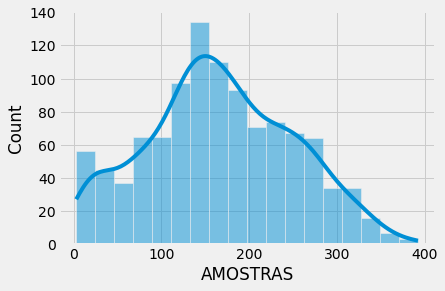

In [55]:
## df_pat
sns.histplot(data=df1, x="AMOSTRAS",kde=True)

In [ ]:
df1['AMOSTRAS']=df1['AMOSTRAS'].astype(str).astype(int)

In [56]:
df1_filtrado = df1[(df1.AMOSTRAS >= 100) & (df1.AMOSTRAS <= 280)]

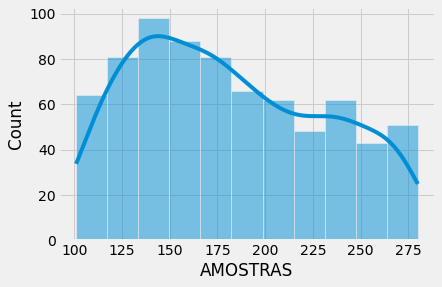

In [57]:
## df_pat
sns.histplot(data=df1_filtrado, x="AMOSTRAS",kde=True)

In [58]:
## df_spat
amostras=[]
COLUNAS = ['VAGAO','EIXO','LADO','AMOSTRAS']

df2 = pd.DataFrame(columns=COLUNAS)

for vagao in list_vagoes_spat:
  for eixo in list_eixos_spat:
    for lado in list_lados_spat:
      df_filtrado = df_spat[(df_spat.VAGAO == vagao)&(df_spat.EIXO == eixo)&(df_spat.LADO == lado)]
      df_filtrado = df_filtrado.drop_duplicates(subset=['DATA_PASSAGEM'])
      amostras.append(vagao)
      amostras.append(eixo)
      amostras.append(lado)
      amostras.append(len(df_filtrado))
      df2.loc[len(df2)]=[amostras[0],amostras[1],amostras[2],amostras[3]]
      amostras=[]

print('Quantidade de rolamentos PAT: ',len(list_vagoes_spat))  
print('Maior quantidade de amostras: ',df2['AMOSTRAS'].max())
print('Menor quantidade de amostras: ',df2['AMOSTRAS'].min()) 

Quantidade de rolamentos PAT:  293
Maior quantidade de amostras:  401
Menor quantidade de amostras:  0


In [60]:
df2 = df2[df2.AMOSTRAS > 0]

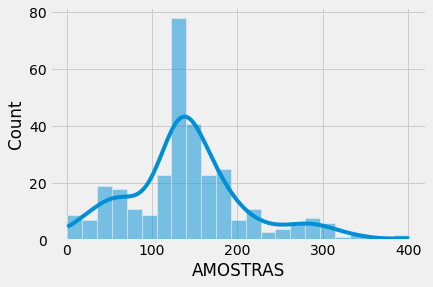

In [61]:
## df_spat
sns.histplot(data=df2, x="AMOSTRAS",kde=True)

In [ ]:
df2['AMOSTRAS']=df2['AMOSTRAS'].astype(str).astype(int)

In [62]:
df2_filtrado = df2[(df2.AMOSTRAS >= 130) & (df2.AMOSTRAS <= 200)]

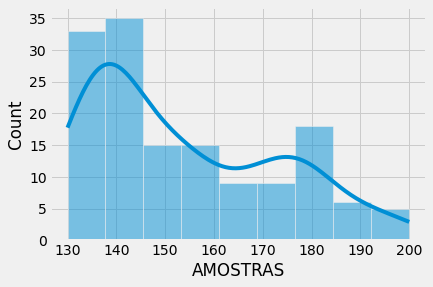

In [63]:
## df_pat
sns.histplot(data=df2_filtrado, x="AMOSTRAS",kde=True)

In [64]:
## df_inst
amostras=[]
COLUNAS = ['VAGAO','EIXO','LADO','AMOSTRAS']

df3 = pd.DataFrame(columns=COLUNAS)

for vagao in list_vagoes_inst:
  for eixo in list_eixos_inst:
    for lado in list_lados_inst:
      df_filtrado = df_inst[(df_inst.VAGAO == vagao)&(df_inst.EIXO == eixo)&(df_inst.LADO == lado)]
      df_filtrado = df_filtrado.drop_duplicates(subset=['DATA_PASSAGEM'])
      amostras.append(vagao)
      amostras.append(eixo)
      amostras.append(lado)
      amostras.append(len(df_filtrado))
      df3.loc[len(df3)]=[amostras[0],amostras[1],amostras[2],amostras[3]]
      amostras=[]

print('Quantidade de rolamentos PAT: ',len(list_vagoes_spat))  
print('Maior quantidade de amostras: ',df3['AMOSTRAS'].max())
print('Menor quantidade de amostras: ',df3['AMOSTRAS'].min()) 

Quantidade de rolamentos PAT:  293
Maior quantidade de amostras:  447
Menor quantidade de amostras:  0


In [65]:
df3 = df3[df3.AMOSTRAS > 0]

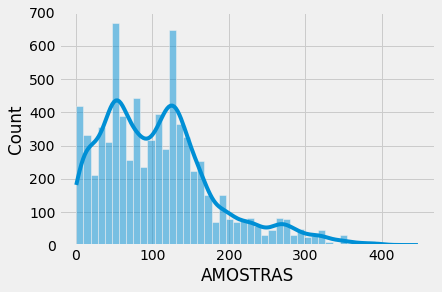

In [66]:
## df_inst
sns.histplot(data=df3, x="AMOSTRAS",kde=True)

In [67]:
df3_filtrado = df3[(df3.AMOSTRAS >= 130) & (df3.AMOSTRAS <= 200)]

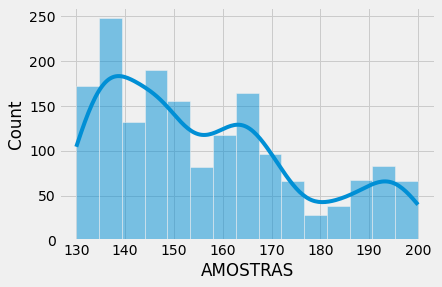

In [68]:
## df_inst
sns.histplot(data=df3_filtrado, x="AMOSTRAS",kde=True)

In [263]:
df3_filtrado.to_csv ("/content/drive/MyDrive/Projetos/Projeto Inteligencia Vagoes/BD_Fase_2/df3_filtrado.csv",index = None,header=True)
df2_filtrado.to_csv ("/content/drive/MyDrive/Projetos/Projeto Inteligencia Vagoes/BD_Fase_2/df2_filtrado.csv",index = None,header=True)
df1_filtrado.to_csv ("/content/drive/MyDrive/Projetos/Projeto Inteligencia Vagoes/BD_Fase_2/df1_filtrado.csv",index = None,header=True)

##Adequando os Datasets

In [78]:
#df_pat
df1_filtrado=df1_filtrado.reset_index()
df1_filtrado = df1_filtrado.drop(['index'], axis=1)

,VAGAO,EIXO,LADO,AMOSTRAS
0,GDT 728741,4,L,179
1,GDT 731326,1,L,214
2,GDT 733086,1,L,239
3,GDT 734783,3,R,237
4,GDT 734791,4,L,160
...,...,...,...,...
739,GDT 613453,1,R,151
740,GDT 734938,4,R,263
741,GDT 733342,3,R,139
742,GDT 729605,2,L,185


In [82]:
#df.pat
COLUNAS = df_pat.columns
df_pat_red = pd.DataFrame(columns=COLUNAS)

for x in range(0,len(df1_filtrado)):
  df = df_pat[(df_pat.VAGAO == df1_filtrado['VAGAO'][x])&(df_pat.EIXO == df1_filtrado['EIXO'][x])&(df_pat.LADO == df1_filtrado['LADO'][x])]
  df_pat_red= pd.concat([df_pat_red,df])

In [86]:
df_pat_red.reset_index(drop=True, inplace=True)
df_pat_red

,DATA_PASSAGEM,VAGAO,EIXO,LADO,VELOCIDADE,FALHA_ROLAMENTO,ERSDB
0,2019-01-11 19:56:19,GDT 728741,4,L,44,.,51
1,2019-01-13 22:57:56,GDT 728741,4,L,53,.,55
2,2019-01-16 01:31:52,GDT 728741,4,L,55,.,58
3,2019-01-18 07:21:04,GDT 728741,4,L,55,.,59
4,2019-01-20 23:55:04,GDT 728741,4,L,55,.,59
...,...,...,...,...,...,...,...
134882,2022-01-31 05:04:19,GDT 730436,3,L,48,RS1_p,59
134883,2022-02-02 20:46:32,GDT 730436,3,L,48,RS3,56
134884,2022-02-06 01:32:17,GDT 730436,3,L,49,RS2,62
134885,2022-02-08 19:57:07,GDT 730436,3,L,51,RS2,61


In [89]:
#df_spat
df2_filtrado.reset_index(drop=True, inplace=True)

In [96]:
#df_spat
COLUNAS = df_spat.columns
df_spat_red = pd.DataFrame(columns=COLUNAS)

for x in range(0,len(df2_filtrado)):
  df = df_spat[(df_spat.VAGAO == df2_filtrado['VAGAO'][x])&(df_spat.EIXO == df2_filtrado['EIXO'][x])&(df_spat.LADO == df2_filtrado['LADO'][x])]
  #print(len(df))
  df_spat_red= pd.concat([df_spat_red,df])

In [91]:
#df_spat
df_spat_red.reset_index(drop=True, inplace=True)
df_spat_red

,DATA_PASSAGEM,VAGAO,EIXO,LADO,VELOCIDADE,FALHA_ROLAMENTO,ERSDB
0,2018-01-01 00:34:35,645436,4.0,R,54,.,53
1,2018-01-02 22:35:51,645436,4.0,R,39,.,53
2,2018-01-05 21:29:50,645436,4.0,R,48,.,56
3,2018-01-08 06:26:30,645436,4.0,R,48,.,58
4,2018-01-14 05:08:36,645436,4.0,R,49,.,52
...,...,...,...,...,...,...,...
22301,2019-01-21 01:47:43,730147,1.0,L,56,RS3,61
22302,2019-01-24 02:19:03,730147,1.0,L,55,RS3,62
22303,2019-02-17 10:52:22,730147,1.0,L,46,.,59
22304,2019-02-20 09:40:12,730147,1.0,L,55,.,65


In [92]:
#df_inst
df3_filtrado.reset_index(drop=True, inplace=True)

In [93]:
#df_inst
COLUNAS = df_spat.columns
df_inst_red = pd.DataFrame(columns=COLUNAS)

for x in range(0,len(df3_filtrado)):
  df = df_inst[(df_inst.VAGAO == df3_filtrado['VAGAO'][x])&(df_inst.EIXO == df3_filtrado['EIXO'][x])&(df_inst.LADO == df3_filtrado['LADO'][x])]
  df_inst_red= pd.concat([df_inst_red,df])

In [94]:
#df_inst
df_inst_red.reset_index(drop=True, inplace=True)
df_inst_red

,DATA_PASSAGEM,VAGAO,EIXO,LADO,VELOCIDADE,FALHA_ROLAMENTO,ERSDB
0,2020-10-10 23:16:54,733969,4.0,L,52,.,52
1,2020-10-14 06:12:11,733969,4.0,L,51,RS3,59
2,2020-10-20 08:57:51,733969,4.0,L,52,RS3,60
3,2020-10-25 00:56:41,733969,4.0,L,47,.,60
4,2020-10-26 22:47:08,733969,4.0,L,52,.,53
...,...,...,...,...,...,...,...
267827,2022-06-17 16:13:45,641913,1.0,R,54,.,54
267828,2022-06-20 09:18:10,641913,1.0,R,53,RS3,56
267829,2022-06-23 22:19:10,641913,1.0,R,48,RS3,59
267830,2022-06-26 11:42:28,641913,1.0,R,50,.,54


In [98]:
df_pat_red.to_csv ("/content/drive/MyDrive/Projetos/Projeto Inteligencia Vagoes/BD_Fase_2/df_pat_red.csv",index = None,header=True)
df_spat_red.to_csv ("/content/drive/MyDrive/Projetos/Projeto Inteligencia Vagoes/BD_Fase_2/df_spat_red.csv",index = None,header=True)
df_inst_red.to_csv ("/content/drive/MyDrive/Projetos/Projeto Inteligencia Vagoes/BD_Fase_2/df_inst_red.csv",index = None,header=True)

##Transformando Dataset para linhas de variáveis 

In [100]:
#df_pat
le = LabelEncoder()
df_pat_red['FALHA_ROLAMENTO'] = le.fit_transform(df_pat_red['FALHA_ROLAMENTO'])
df_pat_red.head()

,DATA_PASSAGEM,VAGAO,EIXO,LADO,VELOCIDADE,FALHA_ROLAMENTO,ERSDB
0,2019-01-11 19:56:19,GDT 728741,4,L,44,0,51
1,2019-01-13 22:57:56,GDT 728741,4,L,53,0,55
2,2019-01-16 01:31:52,GDT 728741,4,L,55,0,58
3,2019-01-18 07:21:04,GDT 728741,4,L,55,0,59
4,2019-01-20 23:55:04,GDT 728741,4,L,55,0,59


In [101]:
#df_spat
le = LabelEncoder()
df_spat_red['FALHA_ROLAMENTO'] = le.fit_transform(df_spat_red['FALHA_ROLAMENTO'])
df_spat_red.head()

,DATA_PASSAGEM,VAGAO,EIXO,LADO,VELOCIDADE,FALHA_ROLAMENTO,ERSDB
726,2018-01-01 00:34:35,645436,4.0,R,54,0,53
727,2018-01-02 22:35:51,645436,4.0,R,39,0,53
728,2018-01-05 21:29:50,645436,4.0,R,48,0,56
729,2018-01-08 06:26:30,645436,4.0,R,48,0,58
730,2018-01-14 05:08:36,645436,4.0,R,49,0,52


In [102]:
#df_inst
le = LabelEncoder()
df_inst_red['FALHA_ROLAMENTO'] = le.fit_transform(df_inst_red['FALHA_ROLAMENTO'])
df_inst_red.head()

,DATA_PASSAGEM,VAGAO,EIXO,LADO,VELOCIDADE,FALHA_ROLAMENTO,ERSDB
0,2020-10-10 23:16:54,733969,4.0,L,52,0,52
1,2020-10-14 06:12:11,733969,4.0,L,51,20,59
2,2020-10-20 08:57:51,733969,4.0,L,52,20,60
3,2020-10-25 00:56:41,733969,4.0,L,47,0,60
4,2020-10-26 22:47:08,733969,4.0,L,52,0,53


In [120]:
#df_pat

vagoes_pat = df_pat_red.drop_duplicates(subset=['VAGAO'])
list_vagoes_pat = vagoes_pat['VAGAO'].tolist()
eixos_pat = df_pat_red.drop_duplicates(subset=['EIXO'])
list_eixos_pat = eixos_pat['EIXO'].tolist()
lados_pat = df_pat_red.drop_duplicates(subset=['LADO'])
list_lados_pat = lados_pat['LADO'].tolist()

In [157]:
df1_filtrado.head(16)

,VAGAO,EIXO,LADO,AMOSTRAS
0,GDT 728741,4,L,179
1,GDT 731326,1,L,214
2,GDT 733086,1,L,239
3,GDT 734783,3,R,237
4,GDT 734791,4,L,160
5,GDT 735184,1,L,168
6,GDT 735489,2,R,248
7,GDT 613467,1,L,243
8,GDT 729247,4,L,174
9,GDT 735334,2,L,147


In [216]:
#df_pat

reamostragem = 200
qtde = len(df1_filtrado)#qtde de rolamentos
ersdb_mat_pat = np.zeros((qtde,reamostragem), dtype=np.int)
f_rolam_mat_pat = np.zeros((qtde,reamostragem), dtype=np.int)
#cont=0

for x in range(0,len(df1_filtrado)):
  df_filtrado = df_pat_red[(df_pat_red.VAGAO == df1_filtrado['VAGAO'][x])&(df_pat_red.EIXO == df1_filtrado['EIXO'][x])&(df_pat_red.LADO == df1_filtrado['LADO'][x])]
  
  if len(df_filtrado)>0:
    #print('x :',x)
    #print('Coluna ',x)
    #ersdb= df_filtrado['ERSDB'].to_numpy()
    ersdb_pat = signal.resample(df_filtrado['ERSDB'].to_numpy(),reamostragem)
    #print('Ersdb_pat resample ',ersdb_pat)
    ersdb_mat_pat[x,:] = ersdb_pat
    #f_rolam= df_filtrado['FALHA_ROLAMENTO'].to_numpy()
    f_rolam_pat = signal.resample(df_filtrado['FALHA_ROLAMENTO'].to_numpy(),reamostragem)
    f_rolam_mat_pat[x,:] = f_rolam_pat
    #cont+=1 
    #print('Quantidade de colunas (máximo 744) ',cont)




/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Depr

In [217]:
stack_pat=np.hstack((ersdb_mat_pat,f_rolam_mat_pat))
stack_pat.shape

(744, 400)

In [220]:
list_a = []
list_b = []

a='ERSDB_'
b='F_ROLAM_'
for x in range (1, 201):
  x=str(x)
  list_a.append(a+x)
  list_b.append(b+x)

In [223]:
colunas = list_a + list_b

In [224]:
df_pat_400cl = pd.DataFrame(stack_pat,columns=[colunas])

In [234]:
df_pat_400cl['TARGET']=1

In [235]:
df_pat_400cl

,ERSDB_1,ERSDB_2,ERSDB_3,ERSDB_4,ERSDB_5,ERSDB_6,ERSDB_7,ERSDB_8,ERSDB_9,ERSDB_10,...,F_ROLAM_192,F_ROLAM_193,F_ROLAM_194,F_ROLAM_195,F_ROLAM_196,F_ROLAM_197,F_ROLAM_198,F_ROLAM_199,F_ROLAM_200,TARGET
0,50,54,58,57,60,57,58,59,57,56,...,0,30,8,9,32,22,32,23,24,1
1,55,59,50,55,55,52,52,55,56,55,...,27,31,27,31,27,34,23,27,22,1
2,59,54,52,56,54,55,55,56,55,56,...,26,32,7,18,29,23,28,23,31,1
3,55,56,53,55,53,52,54,54,54,52,...,25,-8,23,4,2,35,27,24,25,1
4,55,53,57,55,54,53,54,59,56,54,...,17,16,2,18,21,24,16,2,28,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
739,51,50,54,57,57,58,62,61,56,55,...,24,20,26,25,25,25,22,30,16,1
740,60,57,57,57,61,60,62,60,59,60,...,7,36,8,28,31,26,26,23,15,1
741,53,52,52,50,49,52,57,56,51,54,...,28,15,5,20,34,28,24,28,17,1
742,52,50,51,57,53,51,59,52,50,57,...,25,23,25,14,19,27,27,25,26,1


In [226]:
#df_spat

reamostragem = 200
qtde = len(df2_filtrado)#qtde de rolamentos
ersdb_mat_spat = np.zeros((qtde,reamostragem), dtype=np.int)
f_rolam_mat_spat = np.zeros((qtde,reamostragem), dtype=np.int)
#cont=0

for x in range(0,len(df2_filtrado)):
  df_filtrado = df_spat_red[(df_spat_red.VAGAO == df2_filtrado['VAGAO'][x])&(df_spat_red.EIXO == df2_filtrado['EIXO'][x])&(df_spat_red.LADO == df2_filtrado['LADO'][x])]
  
  if len(df_filtrado)>0:
    #print('Coluna ',x)
    #ersdb= df_filtrado['ERSDB'].to_numpy()
    ersdb_spat = signal.resample(df_filtrado['ERSDB'].to_numpy(),reamostragem)
    #print('Ersdb_pat resample ',ersdb_pat)
    ersdb_mat_spat[x,:] = ersdb_spat
    #f_rolam= df_filtrado['FALHA_ROLAMENTO'].to_numpy()
    f_rolam_spat = signal.resample(df_filtrado['FALHA_ROLAMENTO'].to_numpy(),reamostragem)
    f_rolam_mat_spat[x,:] = f_rolam_spat
    #cont+=1 
    #print('Quantidade de colunas (máximo 744) ',cont)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Depr

In [230]:
stack_spat=np.hstack((ersdb_mat_spat,f_rolam_mat_spat))
stack_spat.shape

(145, 400)

In [251]:
df_spat_400cl = pd.DataFrame(stack_spat,columns=[colunas])

In [252]:
df_spat_400cl['TARGET']=0

In [253]:
df_spat_400cl

,ERSDB_1,ERSDB_2,ERSDB_3,ERSDB_4,ERSDB_5,ERSDB_6,ERSDB_7,ERSDB_8,ERSDB_9,ERSDB_10,...,F_ROLAM_192,F_ROLAM_193,F_ROLAM_194,F_ROLAM_195,F_ROLAM_196,F_ROLAM_197,F_ROLAM_198,F_ROLAM_199,F_ROLAM_200,TARGET
0,52,53,52,55,59,55,51,53,53,51,...,0,0,0,0,0,0,0,0,0,0
1,54,53,51,55,57,54,52,52,53,52,...,-1,7,12,2,-3,1,0,-1,1,0
2,51,54,52,53,57,54,51,52,53,52,...,0,1,0,0,1,0,0,1,-1,0
3,54,53,54,54,57,55,52,55,55,52,...,6,0,10,14,9,11,13,12,8,0
4,53,53,56,56,58,56,52,56,58,52,...,11,13,13,11,14,12,10,12,8,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140,55,49,52,52,50,54,56,52,49,50,...,9,12,-1,-3,7,4,0,9,11,0
141,57,52,51,53,53,54,58,57,51,48,...,0,0,0,0,0,0,0,0,0,0
142,58,56,56,56,52,53,58,57,51,49,...,0,1,-2,0,11,10,0,-2,1,0
143,54,50,54,54,50,52,57,53,50,51,...,0,1,-2,1,11,9,0,-1,1,0


In [254]:
df_pat_400cl.to_csv ("/content/drive/MyDrive/Projetos/Projeto Inteligencia Vagoes/BD_Fase_2/df_pat_400cl.csv",index = None,header=True)
df_spat_400cl.to_csv ("/content/drive/MyDrive/Projetos/Projeto Inteligencia Vagoes/BD_Fase_2/df_spat_400cl.csv",index = None,header=True)

In [257]:
n_10_a=list_a[0:190]
n_10_b=list_b[0:190]
n_30_a=list_a[0:170]
n_30_b=list_b[0:170]
n_50_a=list_a[0:150]
n_50_b=list_b[0:150]
n_60_a=list_a[0:140]
n_60_b=list_b[0:140]

list_n_10 = n_10_a + n_10_b 
list_n_30 = n_30_a + n_30_b 
list_n_50 = n_50_a + n_50_b 
list_n_60 = n_60_a + n_60_b 

df_pat_400cl_n_10 = df_pat_400cl[list_n_10]
df_pat_400cl_n_30 = df_pat_400cl[list_n_30]
df_pat_400cl_n_50 = df_pat_400cl[list_n_50]
df_pat_400cl_n_60 = df_pat_400cl[list_n_60]

df_pat_400cl_n_10['TARGET']=1
df_pat_400cl_n_30['TARGET']=1
df_pat_400cl_n_50['TARGET']=1
df_pat_400cl_n_60['TARGET']=1

df_spat_400cl_n_10 = df_spat_400cl[list_n_10]
df_spat_400cl_n_30 = df_spat_400cl[list_n_30]
df_spat_400cl_n_50 = df_spat_400cl[list_n_50]
df_spat_400cl_n_60 = df_spat_400cl[list_n_60]

df_spat_400cl_n_10['TARGET']=0
df_spat_400cl_n_30['TARGET']=0
df_spat_400cl_n_50['TARGET']=0
df_spat_400cl_n_60['TARGET']=0


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stab

In [259]:
df_n_10 = pd.concat([df_pat_400cl_n_10,df_spat_400cl_n_10])
df_n_30 = pd.concat([df_pat_400cl_n_30,df_spat_400cl_n_30])
df_n_50 = pd.concat([df_pat_400cl_n_50,df_spat_400cl_n_50])
df_n_60 = pd.concat([df_pat_400cl_n_60,df_spat_400cl_n_60])

In [261]:
df_n_30

,ERSDB_1,ERSDB_2,ERSDB_3,ERSDB_4,ERSDB_5,ERSDB_6,ERSDB_7,ERSDB_8,ERSDB_9,ERSDB_10,...,F_ROLAM_162,F_ROLAM_163,F_ROLAM_164,F_ROLAM_165,F_ROLAM_166,F_ROLAM_167,F_ROLAM_168,F_ROLAM_169,F_ROLAM_170,TARGET
0,50,54,58,57,60,57,58,59,57,56,...,28,0,0,-2,4,-8,20,23,-4,1
1,55,59,50,55,55,52,52,55,56,55,...,0,0,0,0,0,0,0,0,-1,1
2,59,54,52,56,54,55,55,56,55,56,...,3,-4,25,8,24,-2,0,20,11,1
3,55,56,53,55,53,52,54,54,54,52,...,0,0,0,0,0,1,-2,6,25,1
4,55,53,57,55,54,53,54,59,56,54,...,25,34,22,36,32,3,12,44,21,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140,55,49,52,52,50,54,56,52,49,50,...,0,0,0,0,0,0,0,0,0,0
141,57,52,51,53,53,54,58,57,51,48,...,0,0,0,0,0,0,0,0,0,0
142,58,56,56,56,52,53,58,57,51,49,...,0,0,0,0,0,6,15,14,4,0
143,54,50,54,54,50,52,57,53,50,51,...,-3,5,13,5,-1,0,0,1,11,0


In [262]:
df_n_10.to_csv ("/content/drive/MyDrive/Projetos/Projeto Inteligencia Vagoes/BD_Fase_2/df_n_10.csv",index = None,header=True)
df_n_30.to_csv ("/content/drive/MyDrive/Projetos/Projeto Inteligencia Vagoes/BD_Fase_2/df_n_30.csv",index = None,header=True)
df_n_50.to_csv ("/content/drive/MyDrive/Projetos/Projeto Inteligencia Vagoes/BD_Fase_2/df_n_50.csv",index = None,header=True)
df_n_60.to_csv ("/content/drive/MyDrive/Projetos/Projeto Inteligencia Vagoes/BD_Fase_2/df_n_60.csv",index = None,header=True)

##Desenvolvendo os modelos

In [3]:
df_pat_400cl = pd.read_csv('/content/drive/MyDrive/Projetos/Projeto Inteligencia Vagoes/BD_Fase_2/df_pat_400cl.csv')
df_spat_400cl = pd.read_csv('/content/drive/MyDrive/Projetos/Projeto Inteligencia Vagoes/BD_Fase_2/df_spat_400cl.csv')
df_n_10 = pd.read_csv('/content/drive/MyDrive/Projetos/Projeto Inteligencia Vagoes/BD_Fase_2/df_n_10.csv')
df_n_30 = pd.read_csv('/content/drive/MyDrive/Projetos/Projeto Inteligencia Vagoes/BD_Fase_2/df_n_30.csv')
df_n_50 = pd.read_csv('/content/drive/MyDrive/Projetos/Projeto Inteligencia Vagoes/BD_Fase_2/df_n_50.csv')
df_n_60 = pd.read_csv('/content/drive/MyDrive/Projetos/Projeto Inteligencia Vagoes/BD_Fase_2/df_n_60.csv')

In [4]:
df_n_0 = pd.concat([df_pat_400cl,df_spat_400cl])
df_n_0 

,ERSDB_1,ERSDB_2,ERSDB_3,ERSDB_4,ERSDB_5,ERSDB_6,ERSDB_7,ERSDB_8,ERSDB_9,ERSDB_10,...,F_ROLAM_192,F_ROLAM_193,F_ROLAM_194,F_ROLAM_195,F_ROLAM_196,F_ROLAM_197,F_ROLAM_198,F_ROLAM_199,F_ROLAM_200,TARGET
0,50,54,58,57,60,57,58,59,57,56,...,0,30,8,9,32,22,32,23,24,1
1,55,59,50,55,55,52,52,55,56,55,...,27,31,27,31,27,34,23,27,22,1
2,59,54,52,56,54,55,55,56,55,56,...,26,32,7,18,29,23,28,23,31,1
3,55,56,53,55,53,52,54,54,54,52,...,25,-8,23,4,2,35,27,24,25,1
4,55,53,57,55,54,53,54,59,56,54,...,17,16,2,18,21,24,16,2,28,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140,55,49,52,52,50,54,56,52,49,50,...,9,12,-1,-3,7,4,0,9,11,0
141,57,52,51,53,53,54,58,57,51,48,...,0,0,0,0,0,0,0,0,0,0
142,58,56,56,56,52,53,58,57,51,49,...,0,1,-2,0,11,10,0,-2,1,0
143,54,50,54,54,50,52,57,53,50,51,...,0,1,-2,1,11,9,0,-1,1,0


##Modelo N-10

###Preparação do BD

In [5]:
df_n_10.shape

(889, 381)

In [9]:
array = df_n_10.values
# Separando o array em componentes de input (X) e output (Y)
X = array[:,0:380]
Y = array[:,380]

In [12]:
y_label = Y
classes =[]
labeles=np.unique(y_label)
for v in labeles:
    classes.append('Classe '+ str(v))
print(classes)

['Classe 0', 'Classe 1']


In [13]:
classes[0] = 'Sem PAT'
classes[1] = 'PAT'
classes

['Sem PAT', 'PAT']

In [19]:
y=Y

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y,stratify=y, random_state=0,test_size = 0.25)

In [21]:
counter_antes = Counter(y_train)
counter_antes

Counter({1: 557, 0: 109})

In [22]:
sm = SMOTE(random_state=42)
X_train, y_train = sm.fit_resample(X_train, y_train)

In [23]:
counter_depois = Counter(y_train)
counter_depois

Counter({1: 557, 0: 557})

###Grid Search N-10

In [24]:
random_seed = 1234

names = ["Logistic_Regression","Nearest_Neighbors","Decision_Tree", "Extra_Trees", "Random_Forest",
         "MLP", "AdaBoost","QDA"]

#names = [" Gradient Boosting"]         

classifiers = [
    LogisticRegression(),             
    KNeighborsClassifier(5),
    DecisionTreeClassifier(max_depth=5),
    ExtraTreesClassifier(n_estimators=100, min_samples_split=2),
    RandomForestClassifier(max_depth=5,n_estimators=100),
    MLPClassifier(alpha=1, max_iter=1000),
    AdaBoostClassifier(n_estimators=100),
    QuadraticDiscriminantAnalysis()]

#classifiers = [GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
#                           learning_rate=0.1, loss='deviance', max_depth=3,
#                           max_features=None, max_leaf_nodes=None,
#                           min_impurity_decrease=0.0, min_impurity_split=None,
#                           min_samples_leaf=1, min_samples_split=2,
#                           min_weight_fraction_leaf=0.0, n_estimators=100,
#                           n_iter_no_change=None, presort='deprecated',
#                           random_state=None, subsample=1.0, tol=0.0001,
#                           validation_fraction=0.1, verbose=0,
#                           warm_start=False)]    

def evaluate_model(X_train, y_train, model,name):

    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    #imba_pipeline = make_pipeline(SMOTE('auto',k_neighbors = 2, random_state = random_seed), model)

    cv_results = cross_val_score(model, X_train, y_train, cv = 3, scoring = 'accuracy')
    clf = model.fit(X_train, y_train)

    preds = clf.predict(X_test)
   
    diff = cv_results.mean() - clf.score(X_test, y_test)
    SD = diff / cv_results.std()
    report = classification_report(y_test, preds,target_names= classes)

    print('Classificador: ',name)
    print(report)
    print(f"Training Score:{clf.score(X_train, y_train)}")
    print(f"Cross V Score: {cv_results.mean()} +/- {cv_results.std()}")
    print(f"Testing Score: {clf.score(X_test, y_test)}")
    print(f"Cross & Test Diff: {diff}")
    print(f"Standard Deviations Away: {SD}")
    print(confusion_matrix(y_test, preds))

    cm = confusion_matrix(y_test,preds)
           
    return cm

for name, model in zip(names, classifiers):
    
    #evaluate_model(X_train, y_train, model,name) 
    print('Classificador: ',name)
    (cm)= evaluate_model(X_train, y_train, model,name) 
    sns.set(font_scale=1.2)
    plt.figure(figsize=(6,4))
    plt.title(name)
    df_cm = pd.DataFrame(cm, index=classes, columns=classes)
    cmatrix=sns.heatmap(df_cm,annot=True,fmt='d')
    figure = cmatrix.get_figure() 
    nome_da_figura = '/content/drive/MyDrive/Projeto Eddy Current/Artigo/'+name+'_cmatrix.pdf'   
    figure.savefig(nome_da_figura, dpi=400)
    #score = clf.score(X_test, y_test)
    #scores.append(score)

Classificador:  Logistic_Regression


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


Classificador:  Logistic_Regression
              precision    recall  f1-score   support

     Sem PAT       0.95      1.00      0.97        36
         PAT       1.00      0.99      0.99       187

    accuracy                           0.99       223
   macro avg       0.97      0.99      0.98       223
weighted avg       0.99      0.99      0.99       223

Training Score:1.0
Cross V Score: 0.9910176892830576 +/- 0.004584645060805147
Testing Score: 0.9910313901345291
Cross & Test Diff: -1.37008514715653e-05
Standard Deviations Away: -0.002988421413185513
[[ 36   0]
 [  2 185]]
Classificador:  Nearest_Neighbors
Classificador:  Nearest_Neighbors
              precision    recall  f1-score   support

     Sem PAT       0.30      1.00      0.46        36
         PAT       1.00      0.55      0.71       187

    accuracy                           0.62       223
   macro avg       0.65      0.77      0.58       223
weighted avg       0.89      0.62      0.67       223

Training Score:0.8

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:40: RuntimeWarning: invalid value encountered in double_scalars


Classificador:  Extra_Trees
              precision    recall  f1-score   support

     Sem PAT       1.00      1.00      1.00        36
         PAT       1.00      1.00      1.00       187

    accuracy                           1.00       223
   macro avg       1.00      1.00      1.00       223
weighted avg       1.00      1.00      1.00       223

Training Score:1.0
Cross V Score: 1.0 +/- 0.0
Testing Score: 1.0
Cross & Test Diff: 0.0
Standard Deviations Away: nan
[[ 36   0]
 [  0 187]]
Classificador:  Random_Forest


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:40: RuntimeWarning: invalid value encountered in double_scalars


Classificador:  Random_Forest
              precision    recall  f1-score   support

     Sem PAT       1.00      1.00      1.00        36
         PAT       1.00      1.00      1.00       187

    accuracy                           1.00       223
   macro avg       1.00      1.00      1.00       223
weighted avg       1.00      1.00      1.00       223

Training Score:1.0
Cross V Score: 1.0 +/- 0.0
Testing Score: 1.0
Cross & Test Diff: 0.0
Standard Deviations Away: nan
[[ 36   0]
 [  0 187]]
Classificador:  MLP
Classificador:  MLP
              precision    recall  f1-score   support

     Sem PAT       0.97      0.94      0.96        36
         PAT       0.99      0.99      0.99       187

    accuracy                           0.99       223
   macro avg       0.98      0.97      0.97       223
weighted avg       0.99      0.99      0.99       223

Training Score:0.9919210053859964
Cross V Score: 0.9874286293945455 +/- 0.004588440282692495
Testing Score: 0.9865470852017937
Cross & 

/usr/local/lib/python3.7/dist-packages/sklearn/discriminant_analysis.py:878: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.7/dist-packages/sklearn/discriminant_analysis.py:878: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.7/dist-packages/sklearn/discriminant_analysis.py:878: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division

Classificador:  QDA
              precision    recall  f1-score   support

     Sem PAT       0.00      0.00      0.00        36
         PAT       0.84      1.00      0.91       187

    accuracy                           0.84       223
   macro avg       0.42      0.50      0.46       223
weighted avg       0.70      0.84      0.76       223

Training Score:1.0
Cross V Score: 0.6904592837337816 +/- 0.13150179755282648
Testing Score: 0.8385650224215246
Cross & Test Diff: -0.14810573868774302
Standard Deviations Away: -1.1262639860740036
[[  0  36]
 [  0 187]]


###Melhor Modelo N-10

Classificador:  Logistic Regression


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


Classificador:  Logistic Regression
              precision    recall  f1-score   support

     Sem PAT       0.95      1.00      0.97        36
         PAT       1.00      0.99      0.99       187

    accuracy                           0.99       223
   macro avg       0.97      0.99      0.98       223
weighted avg       0.99      0.99      0.99       223

Training Score:1.0
Cross V Score: 0.9910176892830576 +/- 0.004584645060805147
Testing Score: 0.9910313901345291
Cross & Test Diff: -1.37008514715653e-05
Standard Deviations Away: -0.002988421413185513
[[ 36   0]
 [  2 185]]
Cutoff Point:  0.08


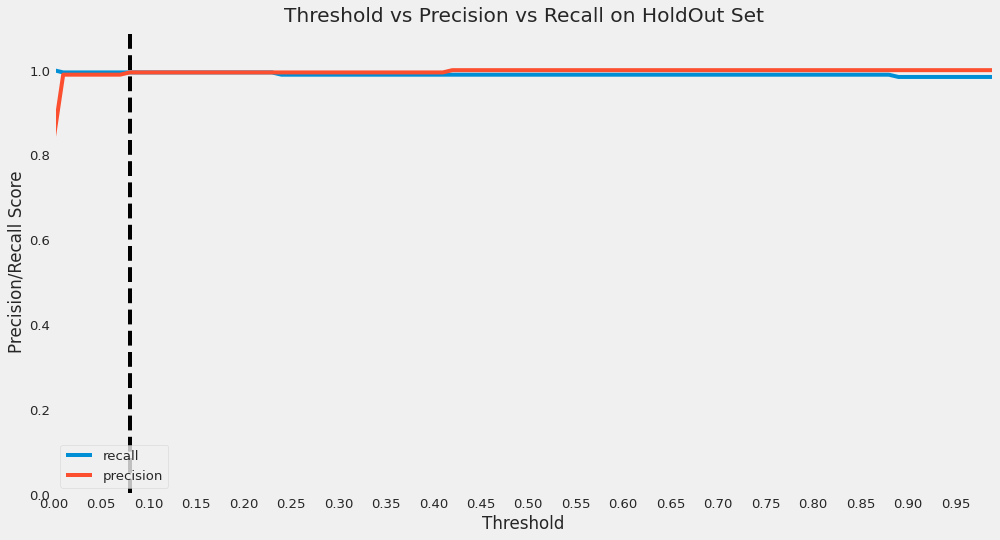

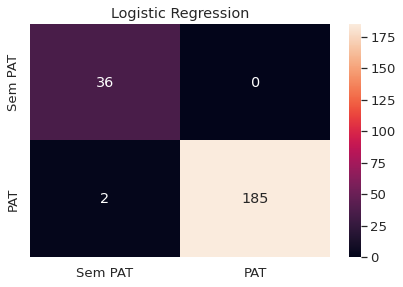

In [26]:
#names = ['Extra Trees']
names = ['Logistic Regression']

#classifiers = [DecisionTreeClassifier(max_depth=5)]
#classifiers = [ExtraTreesClassifier(n_estimators=100, min_samples_split=2)]
classifiers = [LogisticRegression()] 

def evaluate_model(X_train, y_train, model,name):

    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    #imba_pipeline = make_pipeline(SMOTE('auto',k_neighbors = 2, random_state = random_seed), model)

    cv_results = cross_val_score(model, X_train, y_train, cv = 3, scoring = 'accuracy')
    clf = model.fit(X_train, y_train)

    preds = clf.predict(X_test)
   
    diff = cv_results.mean() - clf.score(X_test, y_test)
    SD = diff / cv_results.std()
    report = classification_report(y_test, preds,target_names= classes)

    print('Classificador: ',name)
    print(report)
    print(f"Training Score:{clf.score(X_train, y_train)}")
    print(f"Cross V Score: {cv_results.mean()} +/- {cv_results.std()}")
    print(f"Testing Score: {clf.score(X_test, y_test)}")
    print(f"Cross & Test Diff: {diff}")
    print(f"Standard Deviations Away: {SD}")
    print(confusion_matrix(y_test, preds))

    cm = confusion_matrix(y_test,preds)

    #fig = plt.figure(figsize=(25,20)) 
    #_= tree.plot_tree(model, 
    #               feature_names=nome_colunas,  
    #               class_names=classes,
    #               filled=True)

    preds = clf.predict_proba(X_test)

    final_df = pd.DataFrame()
    for i in np.arange(0, 1, 0.01):
      final_df = final_df.append(pd.DataFrame({"cutoff": i, 
                                           "precision": precision_score(y_test, np.where(preds[:, 1] > i, 1, 0)), 
                                           "recall": recall_score(y_test, np.where(preds[:, 1] > i, 1, 0)),
                                           "f1": f1_score(y_test, np.where(preds[:, 1] > i, 1, 0))}, index = [0]))

    final_df.set_index("cutoff", inplace = True)
    final_df['error'] = abs(final_df['precision'] - final_df['recall'])
    cutoff_point = final_df[final_df['error'] == final_df['error'].min()].index[0]
    print('Cutoff Point: ', cutoff_point)

    ax = final_df.plot(y = ["recall", "precision"], figsize = (15, 8))
    plt.vlines(cutoff_point, 0, 1.1, linestyles = 'dashed', colors = 'black')
    ax.set_xticks(np.arange(0, 1, 0.05))
    ax.set_xlim(0, 0.99)
    ax.set_ylim(0, 1.1)
    ax.set_title("Threshold vs Precision vs Recall on HoldOut Set")
    ax.set_ylabel("Precision/Recall Score")
    ax.set_xlabel("Threshold")
    ax.grid()



           
    return cm

for name, model in zip(names, classifiers):
    
    #evaluate_model(X_train, y_train, model,name) 
    print('Classificador: ',name)
    (cm)= evaluate_model(X_train, y_train, model,name) 
    sns.set(font_scale=1.2)
    plt.figure(figsize=(6,4))
    plt.title(name)
    df_cm = pd.DataFrame(cm, index=classes, columns=classes)
    cmatrix=sns.heatmap(df_cm,annot=True,fmt='d')
    figure = cmatrix.get_figure() 
    nome_da_figura = '/content/drive/MyDrive/Projeto Eddy Current/Artigo/'+name+'_cmatrix.pdf'   
    figure.savefig(nome_da_figura, dpi=400)
    #score = clf.score(X_test, y_test)
    #scores.append(score)


###Salva Modelo N-10

In [28]:
filename = 'modelo_n_10.sav'
pickle.dump(model, open('/content/drive/MyDrive/Projetos/Projeto Inteligencia Vagoes/Modelos/modelo_n_10', 'wb'))

##Modelo N-30

###Preparação do BD

In [29]:
df_n_30.shape

(889, 341)

In [36]:
array = df_n_30.values
# Separando o array em componentes de input (X) e output (Y)
X = array[:,0:340]
Y = array[:,340]

In [38]:
y_label = Y
classes =[]
labeles=np.unique(y_label)
for v in labeles:
    classes.append('Classe '+ str(v))
print(classes)

['Classe 0', 'Classe 1']


In [39]:
classes[0] = 'Sem PAT'
classes[1] = 'PAT'
classes

['Sem PAT', 'PAT']

In [ ]:
y=Y

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y,stratify=y, random_state=0,test_size = 0.25)

In [41]:
counter_antes = Counter(y_train)
counter_antes

Counter({1: 557, 0: 109})

In [42]:
sm = SMOTE(random_state=42)
X_train, y_train = sm.fit_resample(X_train, y_train)

In [43]:
counter_depois = Counter(y_train)
counter_depois

Counter({1: 557, 0: 557})

###Grid Search N-30

Classificador:  Logistic_Regression


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


Classificador:  Logistic_Regression
              precision    recall  f1-score   support

     Sem PAT       0.89      0.92      0.90        36
         PAT       0.98      0.98      0.98       187

    accuracy                           0.97       223
   macro avg       0.94      0.95      0.94       223
weighted avg       0.97      0.97      0.97       223

Training Score:1.0
Cross V Score: 0.9748572587890907 +/- 0.006742921665286505
Testing Score: 0.968609865470852
Cross & Test Diff: 0.006247393318238648
Standard Deviations Away: 0.9265113297105457
[[ 33   3]
 [  4 183]]
Classificador:  Nearest_Neighbors
Classificador:  Nearest_Neighbors
              precision    recall  f1-score   support

     Sem PAT       0.26      1.00      0.42        36
         PAT       1.00      0.47      0.64       187

    accuracy                           0.55       223
   macro avg       0.63      0.73      0.53       223
weighted avg       0.88      0.55      0.60       223

Training Score:0.738779

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:40: RuntimeWarning: invalid value encountered in double_scalars


Classificador:  Random_Forest
              precision    recall  f1-score   support

     Sem PAT       1.00      1.00      1.00        36
         PAT       1.00      1.00      1.00       187

    accuracy                           1.00       223
   macro avg       1.00      1.00      1.00       223
weighted avg       1.00      1.00      1.00       223

Training Score:1.0
Cross V Score: 1.0 +/- 0.0
Testing Score: 1.0
Cross & Test Diff: 0.0
Standard Deviations Away: nan
[[ 36   0]
 [  0 187]]
Classificador:  MLP


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


Classificador:  MLP
              precision    recall  f1-score   support

     Sem PAT       0.91      0.81      0.85        36
         PAT       0.96      0.98      0.97       187

    accuracy                           0.96       223
   macro avg       0.93      0.89      0.91       223
weighted avg       0.95      0.96      0.95       223

Training Score:0.9587073608617595
Cross V Score: 0.9613777545913882 +/- 0.01834189609328184
Testing Score: 0.9551569506726457
Cross & Test Diff: 0.006220803918742468
Standard Deviations Away: 0.33915817029521755
[[ 29   7]
 [  3 184]]
Classificador:  AdaBoost
Classificador:  AdaBoost
              precision    recall  f1-score   support

     Sem PAT       1.00      1.00      1.00        36
         PAT       1.00      1.00      1.00       187

    accuracy                           1.00       223
   macro avg       1.00      1.00      1.00       223
weighted avg       1.00      1.00      1.00       223

Training Score:1.0
Cross V Score: 0.99550

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Classificador:  QDA
              precision    recall  f1-score   support

     Sem PAT       0.00      0.00      0.00        36
         PAT       0.84      1.00      0.91       187

    accuracy                           0.84       223
   macro avg       0.42      0.50      0.46       223
weighted avg       0.70      0.84      0.76       223

Training Score:1.0
Cross V Score: 0.5772299993237303 +/- 0.03831722306098764
Testing Score: 0.8385650224215246
Cross & Test Diff: -0.26133502309779433
Standard Deviations Away: -6.820301739555609
[[  0  36]
 [  0 187]]


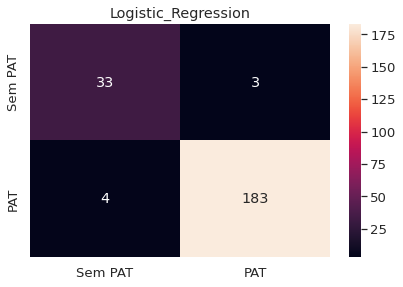

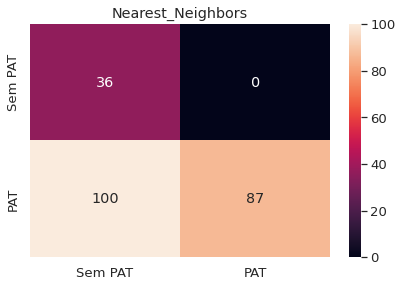

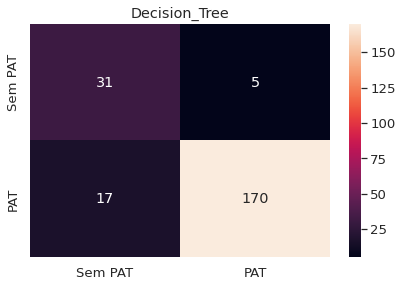

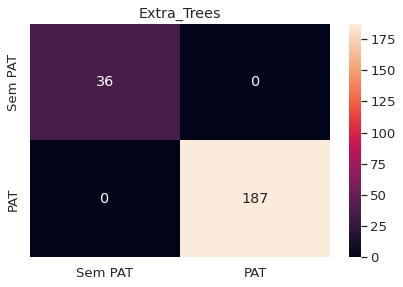

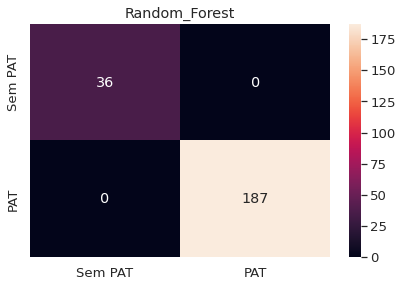

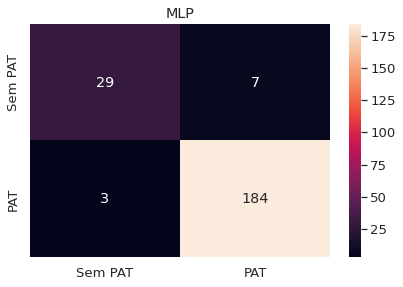

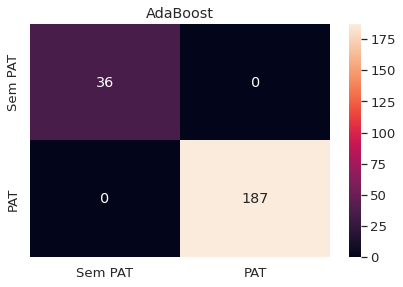

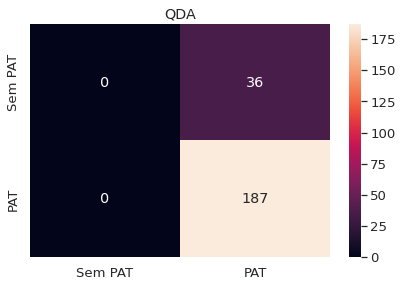

In [44]:
random_seed = 1234

names = ["Logistic_Regression","Nearest_Neighbors","Decision_Tree", "Extra_Trees", "Random_Forest",
         "MLP", "AdaBoost","QDA"]

#names = [" Gradient Boosting"]         

classifiers = [
    LogisticRegression(),             
    KNeighborsClassifier(5),
    DecisionTreeClassifier(max_depth=5),
    ExtraTreesClassifier(n_estimators=100, min_samples_split=2),
    RandomForestClassifier(max_depth=5,n_estimators=100),
    MLPClassifier(alpha=1, max_iter=1000),
    AdaBoostClassifier(n_estimators=100),
    QuadraticDiscriminantAnalysis()]

#classifiers = [GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
#                           learning_rate=0.1, loss='deviance', max_depth=3,
#                           max_features=None, max_leaf_nodes=None,
#                           min_impurity_decrease=0.0, min_impurity_split=None,
#                           min_samples_leaf=1, min_samples_split=2,
#                           min_weight_fraction_leaf=0.0, n_estimators=100,
#                           n_iter_no_change=None, presort='deprecated',
#                           random_state=None, subsample=1.0, tol=0.0001,
#                           validation_fraction=0.1, verbose=0,
#                           warm_start=False)]    

def evaluate_model(X_train, y_train, model,name):

    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    #imba_pipeline = make_pipeline(SMOTE('auto',k_neighbors = 2, random_state = random_seed), model)

    cv_results = cross_val_score(model, X_train, y_train, cv = 3, scoring = 'accuracy')
    clf = model.fit(X_train, y_train)

    preds = clf.predict(X_test)
   
    diff = cv_results.mean() - clf.score(X_test, y_test)
    SD = diff / cv_results.std()
    report = classification_report(y_test, preds,target_names= classes)

    print('Classificador: ',name)
    print(report)
    print(f"Training Score:{clf.score(X_train, y_train)}")
    print(f"Cross V Score: {cv_results.mean()} +/- {cv_results.std()}")
    print(f"Testing Score: {clf.score(X_test, y_test)}")
    print(f"Cross & Test Diff: {diff}")
    print(f"Standard Deviations Away: {SD}")
    print(confusion_matrix(y_test, preds))

    cm = confusion_matrix(y_test,preds)
           
    return cm

for name, model in zip(names, classifiers):
    
    #evaluate_model(X_train, y_train, model,name) 
    print('Classificador: ',name)
    (cm)= evaluate_model(X_train, y_train, model,name) 
    sns.set(font_scale=1.2)
    plt.figure(figsize=(6,4))
    plt.title(name)
    df_cm = pd.DataFrame(cm, index=classes, columns=classes)
    cmatrix=sns.heatmap(df_cm,annot=True,fmt='d')
    figure = cmatrix.get_figure() 
    nome_da_figura = '/content/drive/MyDrive/Projeto Eddy Current/Artigo/'+name+'_cmatrix.pdf'   
    figure.savefig(nome_da_figura, dpi=400)
    #score = clf.score(X_test, y_test)
    #scores.append(score)

###Melhor Modelo N-30

Classificador:  Logistic Regression


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


Classificador:  Logistic Regression
              precision    recall  f1-score   support

     Sem PAT       0.89      0.92      0.90        36
         PAT       0.98      0.98      0.98       187

    accuracy                           0.97       223
   macro avg       0.94      0.95      0.94       223
weighted avg       0.97      0.97      0.97       223

Training Score:1.0
Cross V Score: 0.9748572587890907 +/- 0.006742921665286505
Testing Score: 0.968609865470852
Cross & Test Diff: 0.006247393318238648
Standard Deviations Away: 0.9265113297105457
[[ 33   3]
 [  4 183]]
Cutoff Point:  0.02


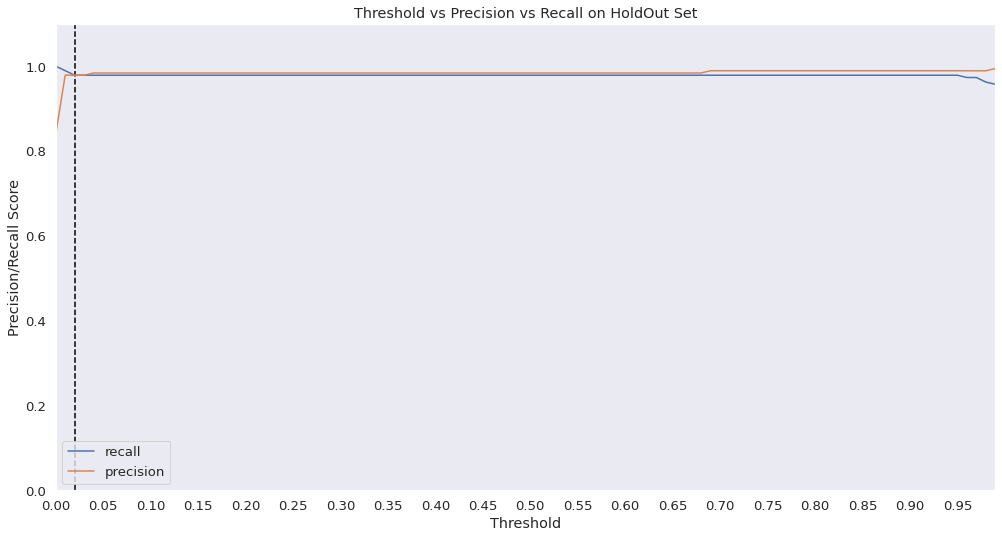

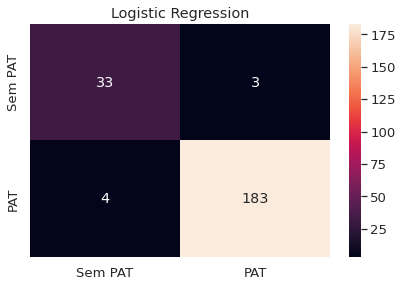

In [45]:
#names = ['Extra Trees']
names = ['Logistic Regression']

#classifiers = [DecisionTreeClassifier(max_depth=5)]
#classifiers = [ExtraTreesClassifier(n_estimators=100, min_samples_split=2)]
classifiers = [LogisticRegression()] 

def evaluate_model(X_train, y_train, model,name):

    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    #imba_pipeline = make_pipeline(SMOTE('auto',k_neighbors = 2, random_state = random_seed), model)

    cv_results = cross_val_score(model, X_train, y_train, cv = 3, scoring = 'accuracy')
    clf = model.fit(X_train, y_train)

    preds = clf.predict(X_test)
   
    diff = cv_results.mean() - clf.score(X_test, y_test)
    SD = diff / cv_results.std()
    report = classification_report(y_test, preds,target_names= classes)

    print('Classificador: ',name)
    print(report)
    print(f"Training Score:{clf.score(X_train, y_train)}")
    print(f"Cross V Score: {cv_results.mean()} +/- {cv_results.std()}")
    print(f"Testing Score: {clf.score(X_test, y_test)}")
    print(f"Cross & Test Diff: {diff}")
    print(f"Standard Deviations Away: {SD}")
    print(confusion_matrix(y_test, preds))

    cm = confusion_matrix(y_test,preds)

    #fig = plt.figure(figsize=(25,20)) 
    #_= tree.plot_tree(model, 
    #               feature_names=nome_colunas,  
    #               class_names=classes,
    #               filled=True)

    preds = clf.predict_proba(X_test)

    final_df = pd.DataFrame()
    for i in np.arange(0, 1, 0.01):
      final_df = final_df.append(pd.DataFrame({"cutoff": i, 
                                           "precision": precision_score(y_test, np.where(preds[:, 1] > i, 1, 0)), 
                                           "recall": recall_score(y_test, np.where(preds[:, 1] > i, 1, 0)),
                                           "f1": f1_score(y_test, np.where(preds[:, 1] > i, 1, 0))}, index = [0]))

    final_df.set_index("cutoff", inplace = True)
    final_df['error'] = abs(final_df['precision'] - final_df['recall'])
    cutoff_point = final_df[final_df['error'] == final_df['error'].min()].index[0]
    print('Cutoff Point: ', cutoff_point)

    ax = final_df.plot(y = ["recall", "precision"], figsize = (15, 8))
    plt.vlines(cutoff_point, 0, 1.1, linestyles = 'dashed', colors = 'black')
    ax.set_xticks(np.arange(0, 1, 0.05))
    ax.set_xlim(0, 0.99)
    ax.set_ylim(0, 1.1)
    ax.set_title("Threshold vs Precision vs Recall on HoldOut Set")
    ax.set_ylabel("Precision/Recall Score")
    ax.set_xlabel("Threshold")
    ax.grid()



           
    return cm

for name, model in zip(names, classifiers):
    
    #evaluate_model(X_train, y_train, model,name) 
    print('Classificador: ',name)
    (cm)= evaluate_model(X_train, y_train, model,name) 
    sns.set(font_scale=1.2)
    plt.figure(figsize=(6,4))
    plt.title(name)
    df_cm = pd.DataFrame(cm, index=classes, columns=classes)
    cmatrix=sns.heatmap(df_cm,annot=True,fmt='d')
    figure = cmatrix.get_figure() 
    nome_da_figura = '/content/drive/MyDrive/Projeto Eddy Current/Artigo/'+name+'_cmatrix.pdf'   
    figure.savefig(nome_da_figura, dpi=400)
    #score = clf.score(X_test, y_test)
    #scores.append(score)


###Salva Modelo N-30

In [46]:
filename = 'modelo_n_30.sav'
pickle.dump(model, open('/content/drive/MyDrive/Projetos/Projeto Inteligencia Vagoes/Modelos/modelo_n_30', 'wb'))

##Modelo N-50

###Preparação do BD

In [47]:
df_n_50.shape

(889, 301)

In [48]:
array = df_n_50.values
# Separando o array em componentes de input (X) e output (Y)
X = array[:,0:300]
Y = array[:,300]

In [50]:
y_label = Y
classes =[]
labeles=np.unique(y_label)
for v in labeles:
    classes.append('Classe '+ str(v))
print(classes)

['Classe 0', 'Classe 1']


In [51]:
classes[0] = 'Sem PAT'
classes[1] = 'PAT'
classes

['Sem PAT', 'PAT']

In [52]:
y=Y

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, y,stratify=y, random_state=0,test_size = 0.25)

In [54]:
counter_antes = Counter(y_train)
counter_antes

Counter({1: 557, 0: 109})

In [55]:
sm = SMOTE(random_state=42)
X_train, y_train = sm.fit_resample(X_train, y_train)

In [56]:
counter_depois = Counter(y_train)
counter_depois

Counter({1: 557, 0: 557})

###Grid Search N-50

Classificador:  Logistic_Regression


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


Classificador:  Logistic_Regression
              precision    recall  f1-score   support

     Sem PAT       0.82      0.92      0.87        36
         PAT       0.98      0.96      0.97       187

    accuracy                           0.96       223
   macro avg       0.90      0.94      0.92       223
weighted avg       0.96      0.96      0.96       223

Training Score:1.0
Cross V Score: 0.9676767237631511 +/- 0.009611416828775442
Testing Score: 0.9551569506726457
Cross & Test Diff: 0.012519773090505337
Standard Deviations Away: 1.3025939165412763
[[ 33   3]
 [  7 180]]
Classificador:  Nearest_Neighbors
Classificador:  Nearest_Neighbors
              precision    recall  f1-score   support

     Sem PAT       0.28      1.00      0.44        36
         PAT       1.00      0.50      0.67       187

    accuracy                           0.58       223
   macro avg       0.64      0.75      0.55       223
weighted avg       0.88      0.58      0.63       223

Training Score:0.73429

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


Classificador:  MLP
              precision    recall  f1-score   support

     Sem PAT       0.88      0.81      0.84        36
         PAT       0.96      0.98      0.97       187

    accuracy                           0.95       223
   macro avg       0.92      0.89      0.91       223
weighted avg       0.95      0.95      0.95       223

Training Score:0.9631956912028725
Cross V Score: 0.87963848554232 +/- 0.12268322557628678
Testing Score: 0.9506726457399103
Cross & Test Diff: -0.07103416019759023
Standard Deviations Away: -0.5790046672144257
[[ 29   7]
 [  4 183]]
Classificador:  AdaBoost
Classificador:  AdaBoost
              precision    recall  f1-score   support

     Sem PAT       0.97      1.00      0.99        36
         PAT       1.00      0.99      1.00       187

    accuracy                           1.00       223
   macro avg       0.99      1.00      0.99       223
weighted avg       1.00      1.00      1.00       223

Training Score:1.0
Cross V Score: 0.9937179

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Classificador:  QDA
              precision    recall  f1-score   support

     Sem PAT       0.00      0.00      0.00        36
         PAT       0.84      1.00      0.91       187

    accuracy                           0.84       223
   macro avg       0.42      0.50      0.46       223
weighted avg       0.70      0.84      0.76       223

Training Score:1.0
Cross V Score: 0.7559560038257543 +/- 0.09771408766021808
Testing Score: 0.8385650224215246
Cross & Test Diff: -0.0826090185957703
Standard Deviations Away: -0.8454156465445111
[[  0  36]
 [  0 187]]


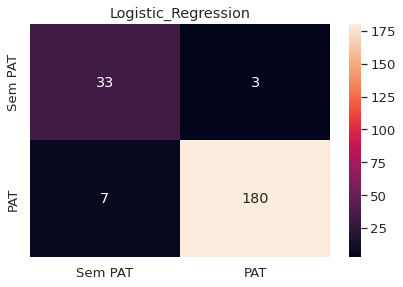

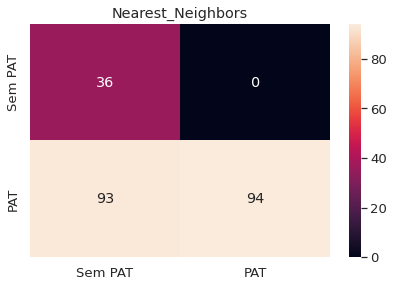

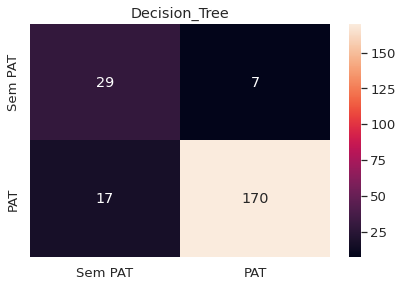

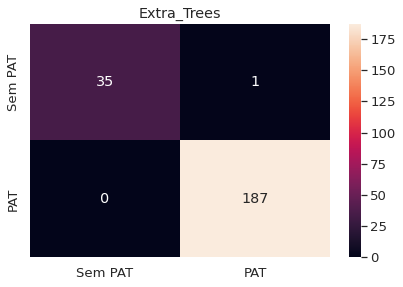

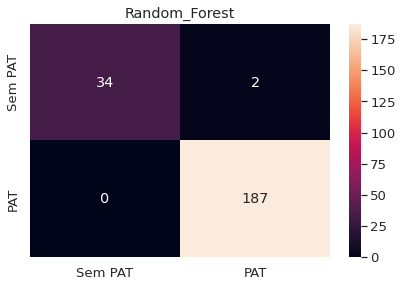

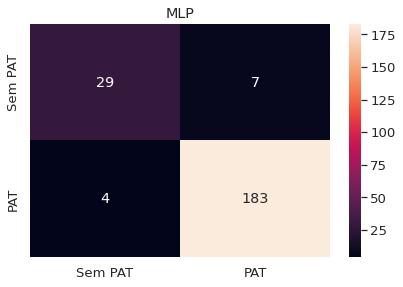

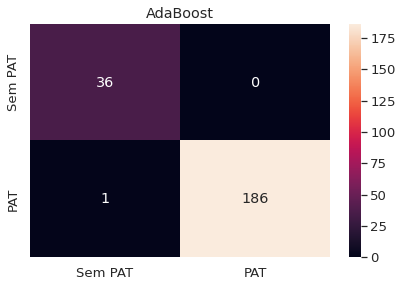

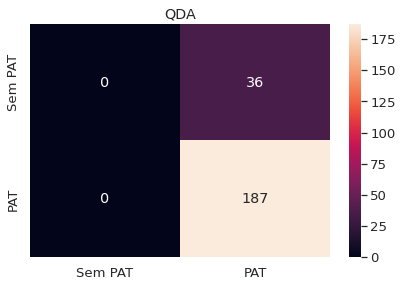

In [57]:
random_seed = 1234

names = ["Logistic_Regression","Nearest_Neighbors","Decision_Tree", "Extra_Trees", "Random_Forest",
         "MLP", "AdaBoost","QDA"]

#names = [" Gradient Boosting"]         

classifiers = [
    LogisticRegression(),             
    KNeighborsClassifier(5),
    DecisionTreeClassifier(max_depth=5),
    ExtraTreesClassifier(n_estimators=100, min_samples_split=2),
    RandomForestClassifier(max_depth=5,n_estimators=100),
    MLPClassifier(alpha=1, max_iter=1000),
    AdaBoostClassifier(n_estimators=100),
    QuadraticDiscriminantAnalysis()]

#classifiers = [GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
#                           learning_rate=0.1, loss='deviance', max_depth=3,
#                           max_features=None, max_leaf_nodes=None,
#                           min_impurity_decrease=0.0, min_impurity_split=None,
#                           min_samples_leaf=1, min_samples_split=2,
#                           min_weight_fraction_leaf=0.0, n_estimators=100,
#                           n_iter_no_change=None, presort='deprecated',
#                           random_state=None, subsample=1.0, tol=0.0001,
#                           validation_fraction=0.1, verbose=0,
#                           warm_start=False)]    

def evaluate_model(X_train, y_train, model,name):

    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    #imba_pipeline = make_pipeline(SMOTE('auto',k_neighbors = 2, random_state = random_seed), model)

    cv_results = cross_val_score(model, X_train, y_train, cv = 3, scoring = 'accuracy')
    clf = model.fit(X_train, y_train)

    preds = clf.predict(X_test)
   
    diff = cv_results.mean() - clf.score(X_test, y_test)
    SD = diff / cv_results.std()
    report = classification_report(y_test, preds,target_names= classes)

    print('Classificador: ',name)
    print(report)
    print(f"Training Score:{clf.score(X_train, y_train)}")
    print(f"Cross V Score: {cv_results.mean()} +/- {cv_results.std()}")
    print(f"Testing Score: {clf.score(X_test, y_test)}")
    print(f"Cross & Test Diff: {diff}")
    print(f"Standard Deviations Away: {SD}")
    print(confusion_matrix(y_test, preds))

    cm = confusion_matrix(y_test,preds)
           
    return cm

for name, model in zip(names, classifiers):
    
    #evaluate_model(X_train, y_train, model,name) 
    print('Classificador: ',name)
    (cm)= evaluate_model(X_train, y_train, model,name) 
    sns.set(font_scale=1.2)
    plt.figure(figsize=(6,4))
    plt.title(name)
    df_cm = pd.DataFrame(cm, index=classes, columns=classes)
    cmatrix=sns.heatmap(df_cm,annot=True,fmt='d')
    figure = cmatrix.get_figure() 
    nome_da_figura = '/content/drive/MyDrive/Projeto Eddy Current/Artigo/'+name+'_cmatrix.pdf'   
    figure.savefig(nome_da_figura, dpi=400)
    #score = clf.score(X_test, y_test)
    #scores.append(score)

###Melhor Modelo N-50

Classificador:  Extra Trees
Classificador:  Extra Trees
              precision    recall  f1-score   support

     Sem PAT       1.00      1.00      1.00        36
         PAT       1.00      1.00      1.00       187

    accuracy                           1.00       223
   macro avg       1.00      1.00      1.00       223
weighted avg       1.00      1.00      1.00       223

Training Score:1.0
Cross V Score: 0.9991039426523297 +/- 0.0012672164537393315
Testing Score: 1.0
Cross & Test Diff: -0.0008960573476702871
Standard Deviations Away: -0.7071067811865767
[[ 36   0]
 [  0 187]]
Cutoff Point:  0.48


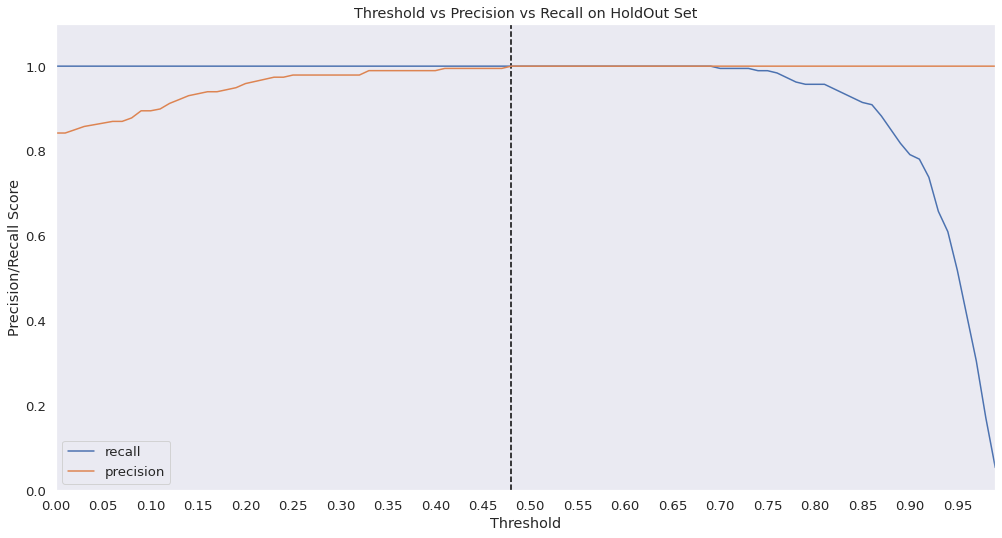

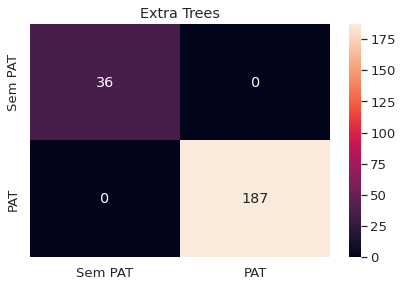

In [58]:
names = ['Extra Trees']
#names = ['Logistic Regression']

#classifiers = [DecisionTreeClassifier(max_depth=5)]
classifiers = [ExtraTreesClassifier(n_estimators=100, min_samples_split=2)]
#classifiers = [LogisticRegression()] 

def evaluate_model(X_train, y_train, model,name):

    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    #imba_pipeline = make_pipeline(SMOTE('auto',k_neighbors = 2, random_state = random_seed), model)

    cv_results = cross_val_score(model, X_train, y_train, cv = 3, scoring = 'accuracy')
    clf = model.fit(X_train, y_train)

    preds = clf.predict(X_test)
   
    diff = cv_results.mean() - clf.score(X_test, y_test)
    SD = diff / cv_results.std()
    report = classification_report(y_test, preds,target_names= classes)

    print('Classificador: ',name)
    print(report)
    print(f"Training Score:{clf.score(X_train, y_train)}")
    print(f"Cross V Score: {cv_results.mean()} +/- {cv_results.std()}")
    print(f"Testing Score: {clf.score(X_test, y_test)}")
    print(f"Cross & Test Diff: {diff}")
    print(f"Standard Deviations Away: {SD}")
    print(confusion_matrix(y_test, preds))

    cm = confusion_matrix(y_test,preds)

    #fig = plt.figure(figsize=(25,20)) 
    #_= tree.plot_tree(model, 
    #               feature_names=nome_colunas,  
    #               class_names=classes,
    #               filled=True)

    preds = clf.predict_proba(X_test)

    final_df = pd.DataFrame()
    for i in np.arange(0, 1, 0.01):
      final_df = final_df.append(pd.DataFrame({"cutoff": i, 
                                           "precision": precision_score(y_test, np.where(preds[:, 1] > i, 1, 0)), 
                                           "recall": recall_score(y_test, np.where(preds[:, 1] > i, 1, 0)),
                                           "f1": f1_score(y_test, np.where(preds[:, 1] > i, 1, 0))}, index = [0]))

    final_df.set_index("cutoff", inplace = True)
    final_df['error'] = abs(final_df['precision'] - final_df['recall'])
    cutoff_point = final_df[final_df['error'] == final_df['error'].min()].index[0]
    print('Cutoff Point: ', cutoff_point)

    ax = final_df.plot(y = ["recall", "precision"], figsize = (15, 8))
    plt.vlines(cutoff_point, 0, 1.1, linestyles = 'dashed', colors = 'black')
    ax.set_xticks(np.arange(0, 1, 0.05))
    ax.set_xlim(0, 0.99)
    ax.set_ylim(0, 1.1)
    ax.set_title("Threshold vs Precision vs Recall on HoldOut Set")
    ax.set_ylabel("Precision/Recall Score")
    ax.set_xlabel("Threshold")
    ax.grid()



           
    return cm

for name, model in zip(names, classifiers):
    
    #evaluate_model(X_train, y_train, model,name) 
    print('Classificador: ',name)
    (cm)= evaluate_model(X_train, y_train, model,name) 
    sns.set(font_scale=1.2)
    plt.figure(figsize=(6,4))
    plt.title(name)
    df_cm = pd.DataFrame(cm, index=classes, columns=classes)
    cmatrix=sns.heatmap(df_cm,annot=True,fmt='d')
    figure = cmatrix.get_figure() 
    nome_da_figura = '/content/drive/MyDrive/Projeto Eddy Current/Artigo/'+name+'_cmatrix.pdf'   
    figure.savefig(nome_da_figura, dpi=400)
    #score = clf.score(X_test, y_test)
    #scores.append(score)

###Salva Modelo N-50

In [59]:
filename = 'modelo_n_50.sav'
pickle.dump(model, open('/content/drive/MyDrive/Projetos/Projeto Inteligencia Vagoes/Modelos/modelo_n_50', 'wb'))

##Modelo N-60

###Preparação do BD

In [60]:
df_n_60.shape

(889, 281)

In [61]:
array = df_n_60.values
# Separando o array em componentes de input (X) e output (Y)
X = array[:,0:280]
Y = array[:,280]

In [63]:
y_label = Y
classes =[]
labeles=np.unique(y_label)
for v in labeles:
    classes.append('Classe '+ str(v))
print(classes)

['Classe 0', 'Classe 1']


In [64]:
classes[0] = 'Sem PAT'
classes[1] = 'PAT'
classes

['Sem PAT', 'PAT']

In [65]:
y=Y

In [66]:
X_train, X_test, y_train, y_test = train_test_split(X, y,stratify=y, random_state=0,test_size = 0.25)

In [67]:
counter_antes = Counter(y_train)
counter_antes

Counter({1: 557, 0: 109})

In [68]:
sm = SMOTE(random_state=42)
X_train, y_train = sm.fit_resample(X_train, y_train)

In [69]:
counter_depois = Counter(y_train)
counter_depois

Counter({1: 557, 0: 557})

###Grid Search N-60

Classificador:  Logistic_Regression


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


Classificador:  Logistic_Regression
              precision    recall  f1-score   support

     Sem PAT       0.85      0.92      0.88        36
         PAT       0.98      0.97      0.98       187

    accuracy                           0.96       223
   macro avg       0.91      0.94      0.93       223
weighted avg       0.96      0.96      0.96       223

Training Score:1.0
Cross V Score: 0.9595904703938789 +/- 0.015892355850226303
Testing Score: 0.9596412556053812
Cross & Test Diff: -5.078521150225779e-05
Standard Deviations Away: -0.0031955747770104595
[[ 33   3]
 [  6 181]]
Classificador:  Nearest_Neighbors
Classificador:  Nearest_Neighbors
              precision    recall  f1-score   support

     Sem PAT       0.27      1.00      0.43        36
         PAT       1.00      0.49      0.66       187

    accuracy                           0.57       223
   macro avg       0.64      0.75      0.55       223
weighted avg       0.88      0.57      0.62       223

Training Score:0

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Classificador:  QDA
              precision    recall  f1-score   support

     Sem PAT       0.00      0.00      0.00        36
         PAT       0.84      1.00      0.91       187

    accuracy                           0.84       223
   macro avg       0.42      0.50      0.46       223
weighted avg       0.70      0.84      0.76       223

Training Score:1.0
Cross V Score: 0.850235245244375 +/- 0.11548540772035108
Testing Score: 0.8385650224215246
Cross & Test Diff: 0.011670222822850351
Standard Deviations Away: 0.10105365736864261
[[  0  36]
 [  0 187]]


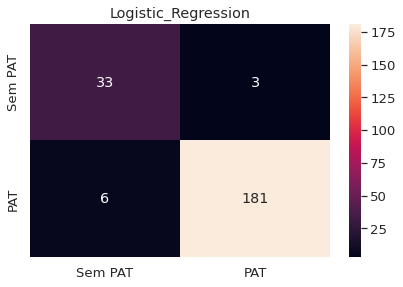

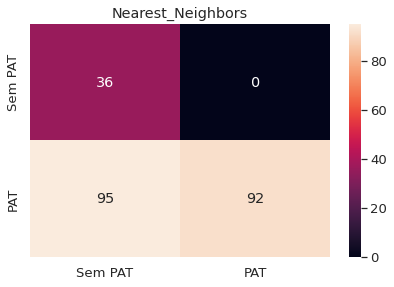

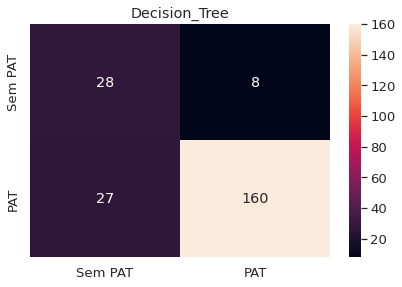

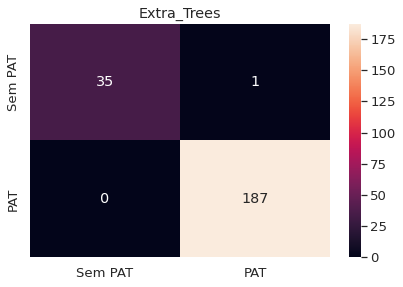

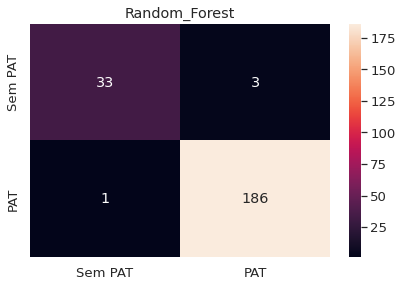

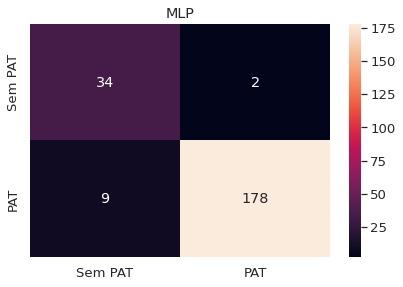

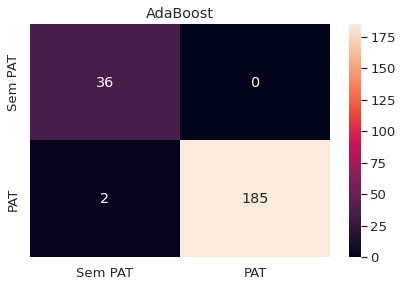

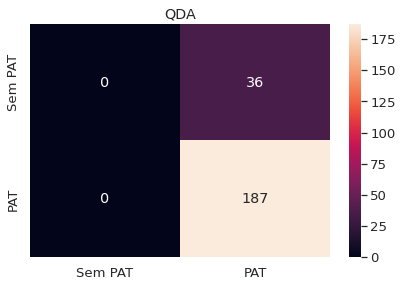

In [70]:
random_seed = 1234

names = ["Logistic_Regression","Nearest_Neighbors","Decision_Tree", "Extra_Trees", "Random_Forest",
         "MLP", "AdaBoost","QDA"]

#names = [" Gradient Boosting"]         

classifiers = [
    LogisticRegression(),             
    KNeighborsClassifier(5),
    DecisionTreeClassifier(max_depth=5),
    ExtraTreesClassifier(n_estimators=100, min_samples_split=2),
    RandomForestClassifier(max_depth=5,n_estimators=100),
    MLPClassifier(alpha=1, max_iter=1000),
    AdaBoostClassifier(n_estimators=100),
    QuadraticDiscriminantAnalysis()]

#classifiers = [GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
#                           learning_rate=0.1, loss='deviance', max_depth=3,
#                           max_features=None, max_leaf_nodes=None,
#                           min_impurity_decrease=0.0, min_impurity_split=None,
#                           min_samples_leaf=1, min_samples_split=2,
#                           min_weight_fraction_leaf=0.0, n_estimators=100,
#                           n_iter_no_change=None, presort='deprecated',
#                           random_state=None, subsample=1.0, tol=0.0001,
#                           validation_fraction=0.1, verbose=0,
#                           warm_start=False)]    

def evaluate_model(X_train, y_train, model,name):

    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    #imba_pipeline = make_pipeline(SMOTE('auto',k_neighbors = 2, random_state = random_seed), model)

    cv_results = cross_val_score(model, X_train, y_train, cv = 3, scoring = 'accuracy')
    clf = model.fit(X_train, y_train)

    preds = clf.predict(X_test)
   
    diff = cv_results.mean() - clf.score(X_test, y_test)
    SD = diff / cv_results.std()
    report = classification_report(y_test, preds,target_names= classes)

    print('Classificador: ',name)
    print(report)
    print(f"Training Score:{clf.score(X_train, y_train)}")
    print(f"Cross V Score: {cv_results.mean()} +/- {cv_results.std()}")
    print(f"Testing Score: {clf.score(X_test, y_test)}")
    print(f"Cross & Test Diff: {diff}")
    print(f"Standard Deviations Away: {SD}")
    print(confusion_matrix(y_test, preds))

    cm = confusion_matrix(y_test,preds)
           
    return cm

for name, model in zip(names, classifiers):
    
    #evaluate_model(X_train, y_train, model,name) 
    print('Classificador: ',name)
    (cm)= evaluate_model(X_train, y_train, model,name) 
    sns.set(font_scale=1.2)
    plt.figure(figsize=(6,4))
    plt.title(name)
    df_cm = pd.DataFrame(cm, index=classes, columns=classes)
    cmatrix=sns.heatmap(df_cm,annot=True,fmt='d')
    figure = cmatrix.get_figure() 
    nome_da_figura = '/content/drive/MyDrive/Projeto Eddy Current/Artigo/'+name+'_cmatrix.pdf'   
    figure.savefig(nome_da_figura, dpi=400)
    #score = clf.score(X_test, y_test)
    #scores.append(score)

###Melhor Modelo N-60

Classificador:  Extra Trees
Classificador:  Extra Trees
              precision    recall  f1-score   support

     Sem PAT       1.00      0.97      0.99        36
         PAT       0.99      1.00      1.00       187

    accuracy                           1.00       223
   macro avg       1.00      0.99      0.99       223
weighted avg       1.00      1.00      1.00       223

Training Score:1.0
Cross V Score: 0.9964109401114878 +/- 0.001263800775966426
Testing Score: 0.9955156950672646
Cross & Test Diff: 0.0008952450442232252
Standard Deviations Away: 0.7083751341572275
[[ 35   1]
 [  0 187]]
Cutoff Point:  0.66


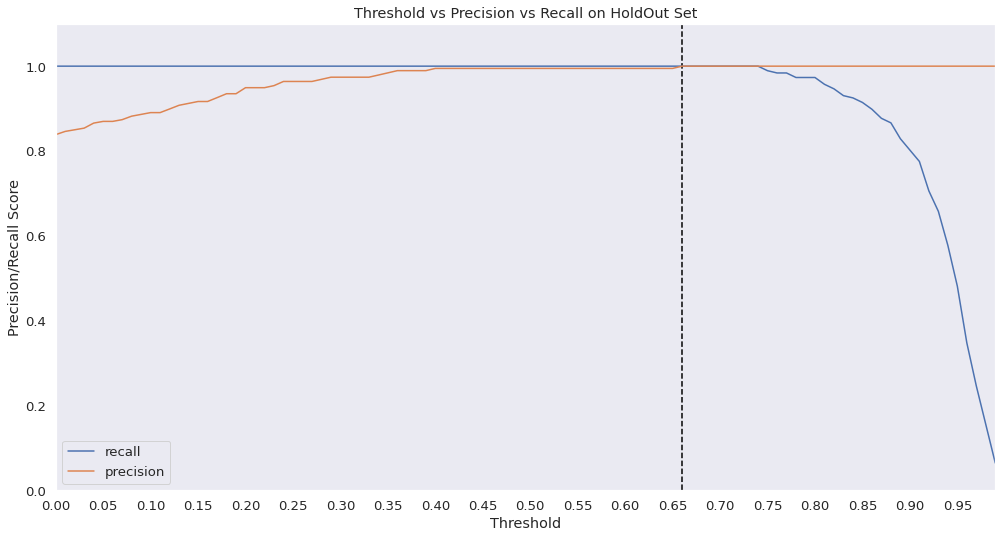

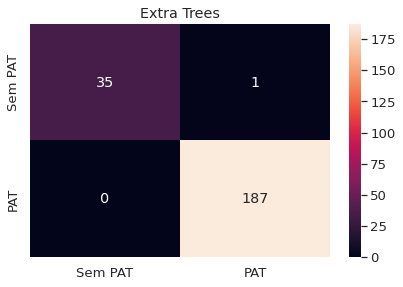

In [71]:
names = ['Extra Trees']
#names = ['Logistic Regression']

#classifiers = [DecisionTreeClassifier(max_depth=5)]
classifiers = [ExtraTreesClassifier(n_estimators=100, min_samples_split=2)]
#classifiers = [LogisticRegression()] 

def evaluate_model(X_train, y_train, model,name):

    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    #imba_pipeline = make_pipeline(SMOTE('auto',k_neighbors = 2, random_state = random_seed), model)

    cv_results = cross_val_score(model, X_train, y_train, cv = 3, scoring = 'accuracy')
    clf = model.fit(X_train, y_train)

    preds = clf.predict(X_test)
   
    diff = cv_results.mean() - clf.score(X_test, y_test)
    SD = diff / cv_results.std()
    report = classification_report(y_test, preds,target_names= classes)

    print('Classificador: ',name)
    print(report)
    print(f"Training Score:{clf.score(X_train, y_train)}")
    print(f"Cross V Score: {cv_results.mean()} +/- {cv_results.std()}")
    print(f"Testing Score: {clf.score(X_test, y_test)}")
    print(f"Cross & Test Diff: {diff}")
    print(f"Standard Deviations Away: {SD}")
    print(confusion_matrix(y_test, preds))

    cm = confusion_matrix(y_test,preds)

    #fig = plt.figure(figsize=(25,20)) 
    #_= tree.plot_tree(model, 
    #               feature_names=nome_colunas,  
    #               class_names=classes,
    #               filled=True)

    preds = clf.predict_proba(X_test)

    final_df = pd.DataFrame()
    for i in np.arange(0, 1, 0.01):
      final_df = final_df.append(pd.DataFrame({"cutoff": i, 
                                           "precision": precision_score(y_test, np.where(preds[:, 1] > i, 1, 0)), 
                                           "recall": recall_score(y_test, np.where(preds[:, 1] > i, 1, 0)),
                                           "f1": f1_score(y_test, np.where(preds[:, 1] > i, 1, 0))}, index = [0]))

    final_df.set_index("cutoff", inplace = True)
    final_df['error'] = abs(final_df['precision'] - final_df['recall'])
    cutoff_point = final_df[final_df['error'] == final_df['error'].min()].index[0]
    print('Cutoff Point: ', cutoff_point)

    ax = final_df.plot(y = ["recall", "precision"], figsize = (15, 8))
    plt.vlines(cutoff_point, 0, 1.1, linestyles = 'dashed', colors = 'black')
    ax.set_xticks(np.arange(0, 1, 0.05))
    ax.set_xlim(0, 0.99)
    ax.set_ylim(0, 1.1)
    ax.set_title("Threshold vs Precision vs Recall on HoldOut Set")
    ax.set_ylabel("Precision/Recall Score")
    ax.set_xlabel("Threshold")
    ax.grid()



           
    return cm

for name, model in zip(names, classifiers):
    
    #evaluate_model(X_train, y_train, model,name) 
    print('Classificador: ',name)
    (cm)= evaluate_model(X_train, y_train, model,name) 
    sns.set(font_scale=1.2)
    plt.figure(figsize=(6,4))
    plt.title(name)
    df_cm = pd.DataFrame(cm, index=classes, columns=classes)
    cmatrix=sns.heatmap(df_cm,annot=True,fmt='d')
    figure = cmatrix.get_figure() 
    nome_da_figura = '/content/drive/MyDrive/Projeto Eddy Current/Artigo/'+name+'_cmatrix.pdf'   
    figure.savefig(nome_da_figura, dpi=400)
    #score = clf.score(X_test, y_test)
    #scores.append(score)

###Salva Modelo N-60

In [72]:
filename = 'modelo_n_60.sav'
pickle.dump(model, open('/content/drive/MyDrive/Projetos/Projeto Inteligencia Vagoes/Modelos/modelo_n_60', 'wb'))

##Modelo N-0

###Preparação do BD

In [73]:
df_n_0.shape

(889, 401)

In [74]:
array = df_n_0.values
# Separando o array em componentes de input (X) e output (Y)
X = array[:,0:400]
Y = array[:,400]

In [76]:
y_label = Y
classes =[]
labeles=np.unique(y_label)
for v in labeles:
    classes.append('Classe '+ str(v))
print(classes)

['Classe 0', 'Classe 1']


In [77]:
classes[0] = 'Sem PAT'
classes[1] = 'PAT'
classes

['Sem PAT', 'PAT']

In [78]:
y=Y

In [79]:
X_train, X_test, y_train, y_test = train_test_split(X, y,stratify=y, random_state=0,test_size = 0.25)

In [80]:
counter_antes = Counter(y_train)
counter_antes

Counter({1: 557, 0: 109})

In [81]:
sm = SMOTE(random_state=42)
X_train, y_train = sm.fit_resample(X_train, y_train)

In [82]:
counter_depois = Counter(y_train)
counter_depois

Counter({1: 557, 0: 557})

###Grid Search N-0

Classificador:  Logistic_Regression


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


Classificador:  Logistic_Regression
              precision    recall  f1-score   support

     Sem PAT       1.00      1.00      1.00        36
         PAT       1.00      1.00      1.00       187

    accuracy                           1.00       223
   macro avg       1.00      1.00      1.00       223
weighted avg       1.00      1.00      1.00       223

Training Score:1.0
Cross V Score: 0.9991015274034142 +/- 0.001270632131512237
Testing Score: 1.0
Cross & Test Diff: -0.0008984725965858198
Standard Deviations Away: -0.7071067811865476
[[ 36   0]
 [  0 187]]
Classificador:  Nearest_Neighbors
Classificador:  Nearest_Neighbors
              precision    recall  f1-score   support

     Sem PAT       0.36      1.00      0.53        36
         PAT       1.00      0.66      0.79       187

    accuracy                           0.71       223
   macro avg       0.68      0.83      0.66       223
weighted avg       0.90      0.71      0.75       223

Training Score:0.8527827648114902


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:40: RuntimeWarning: invalid value encountered in double_scalars


Classificador:  Extra_Trees
              precision    recall  f1-score   support

     Sem PAT       1.00      1.00      1.00        36
         PAT       1.00      1.00      1.00       187

    accuracy                           1.00       223
   macro avg       1.00      1.00      1.00       223
weighted avg       1.00      1.00      1.00       223

Training Score:1.0
Cross V Score: 1.0 +/- 0.0
Testing Score: 1.0
Cross & Test Diff: 0.0
Standard Deviations Away: nan
[[ 36   0]
 [  0 187]]
Classificador:  Random_Forest


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:40: RuntimeWarning: invalid value encountered in double_scalars


Classificador:  Random_Forest
              precision    recall  f1-score   support

     Sem PAT       1.00      1.00      1.00        36
         PAT       1.00      1.00      1.00       187

    accuracy                           1.00       223
   macro avg       1.00      1.00      1.00       223
weighted avg       1.00      1.00      1.00       223

Training Score:1.0
Cross V Score: 1.0 +/- 0.0
Testing Score: 1.0
Cross & Test Diff: 0.0
Standard Deviations Away: nan
[[ 36   0]
 [  0 187]]
Classificador:  MLP


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


Classificador:  MLP
              precision    recall  f1-score   support

     Sem PAT       1.00      1.00      1.00        36
         PAT       1.00      1.00      1.00       187

    accuracy                           1.00       223
   macro avg       1.00      1.00      1.00       223
weighted avg       1.00      1.00      1.00       223

Training Score:1.0
Cross V Score: 0.9991015274034142 +/- 0.001270632131512237
Testing Score: 1.0
Cross & Test Diff: -0.0008984725965858198
Standard Deviations Away: -0.7071067811865476
[[ 36   0]
 [  0 187]]
Classificador:  AdaBoost


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:40: RuntimeWarning: divide by zero encountered in double_scalars


Classificador:  AdaBoost
              precision    recall  f1-score   support

     Sem PAT       0.97      1.00      0.99        36
         PAT       1.00      0.99      1.00       187

    accuracy                           1.00       223
   macro avg       0.99      1.00      0.99       223
weighted avg       1.00      1.00      1.00       223

Training Score:1.0
Cross V Score: 1.0 +/- 0.0
Testing Score: 0.9955156950672646
Cross & Test Diff: 0.004484304932735439
Standard Deviations Away: inf
[[ 36   0]
 [  1 186]]
Classificador:  QDA


/usr/local/lib/python3.7/dist-packages/sklearn/discriminant_analysis.py:878: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.7/dist-packages/sklearn/discriminant_analysis.py:878: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.7/dist-packages/sklearn/discriminant_analysis.py:878: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division

Classificador:  QDA
              precision    recall  f1-score   support

     Sem PAT       0.00      0.00      0.00        36
         PAT       0.84      1.00      0.91       187

    accuracy                           0.84       223
   macro avg       0.42      0.50      0.46       223
weighted avg       0.70      0.84      0.76       223

Training Score:1.0
Cross V Score: 0.5260436290564106 +/- 0.008979185416537536
Testing Score: 0.8385650224215246
Cross & Test Diff: -0.3125213933651141
Standard Deviations Away: -34.80509410013113
[[  0  36]
 [  0 187]]


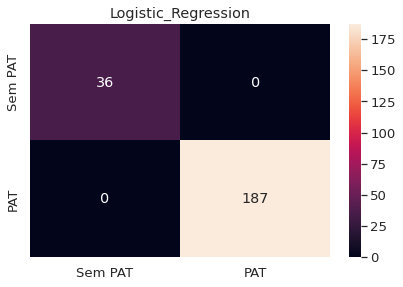

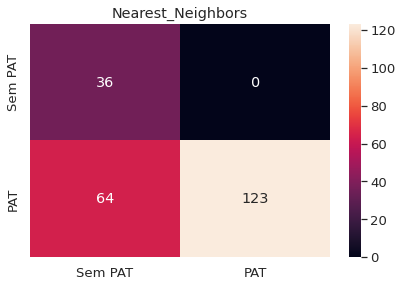

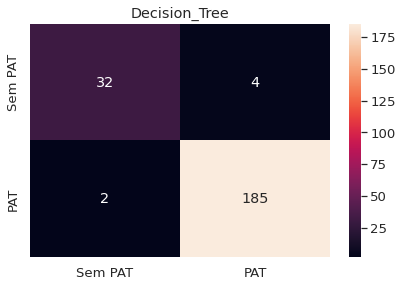

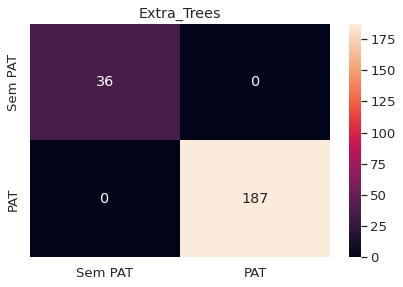

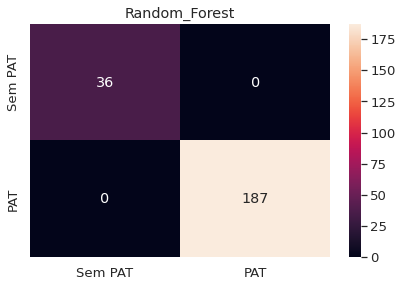

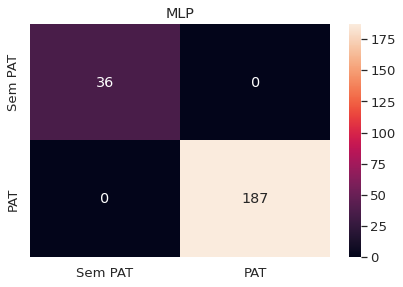

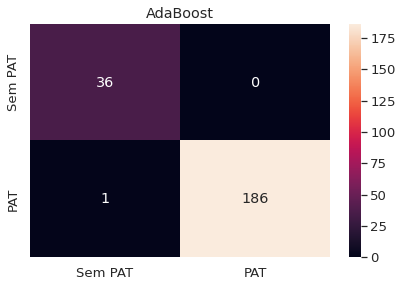

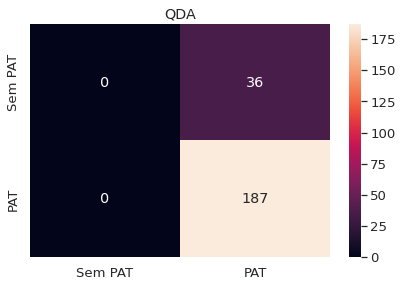

In [83]:
random_seed = 1234

names = ["Logistic_Regression","Nearest_Neighbors","Decision_Tree", "Extra_Trees", "Random_Forest",
         "MLP", "AdaBoost","QDA"]

#names = [" Gradient Boosting"]         

classifiers = [
    LogisticRegression(),             
    KNeighborsClassifier(5),
    DecisionTreeClassifier(max_depth=5),
    ExtraTreesClassifier(n_estimators=100, min_samples_split=2),
    RandomForestClassifier(max_depth=5,n_estimators=100),
    MLPClassifier(alpha=1, max_iter=1000),
    AdaBoostClassifier(n_estimators=100),
    QuadraticDiscriminantAnalysis()]

#classifiers = [GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
#                           learning_rate=0.1, loss='deviance', max_depth=3,
#                           max_features=None, max_leaf_nodes=None,
#                           min_impurity_decrease=0.0, min_impurity_split=None,
#                           min_samples_leaf=1, min_samples_split=2,
#                           min_weight_fraction_leaf=0.0, n_estimators=100,
#                           n_iter_no_change=None, presort='deprecated',
#                           random_state=None, subsample=1.0, tol=0.0001,
#                           validation_fraction=0.1, verbose=0,
#                           warm_start=False)]    

def evaluate_model(X_train, y_train, model,name):

    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    #imba_pipeline = make_pipeline(SMOTE('auto',k_neighbors = 2, random_state = random_seed), model)

    cv_results = cross_val_score(model, X_train, y_train, cv = 3, scoring = 'accuracy')
    clf = model.fit(X_train, y_train)

    preds = clf.predict(X_test)
   
    diff = cv_results.mean() - clf.score(X_test, y_test)
    SD = diff / cv_results.std()
    report = classification_report(y_test, preds,target_names= classes)

    print('Classificador: ',name)
    print(report)
    print(f"Training Score:{clf.score(X_train, y_train)}")
    print(f"Cross V Score: {cv_results.mean()} +/- {cv_results.std()}")
    print(f"Testing Score: {clf.score(X_test, y_test)}")
    print(f"Cross & Test Diff: {diff}")
    print(f"Standard Deviations Away: {SD}")
    print(confusion_matrix(y_test, preds))

    cm = confusion_matrix(y_test,preds)
           
    return cm

for name, model in zip(names, classifiers):
    
    #evaluate_model(X_train, y_train, model,name) 
    print('Classificador: ',name)
    (cm)= evaluate_model(X_train, y_train, model,name) 
    sns.set(font_scale=1.2)
    plt.figure(figsize=(6,4))
    plt.title(name)
    df_cm = pd.DataFrame(cm, index=classes, columns=classes)
    cmatrix=sns.heatmap(df_cm,annot=True,fmt='d')
    figure = cmatrix.get_figure() 
    nome_da_figura = '/content/drive/MyDrive/Projeto Eddy Current/Artigo/'+name+'_cmatrix.pdf'   
    figure.savefig(nome_da_figura, dpi=400)
    #score = clf.score(X_test, y_test)
    #scores.append(score)

###Melhor Modelo N-0

Classificador:  Logistic Regression


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


Classificador:  Logistic Regression
              precision    recall  f1-score   support

     Sem PAT       1.00      1.00      1.00        36
         PAT       1.00      1.00      1.00       187

    accuracy                           1.00       223
   macro avg       1.00      1.00      1.00       223
weighted avg       1.00      1.00      1.00       223

Training Score:1.0
Cross V Score: 0.9991015274034142 +/- 0.001270632131512237
Testing Score: 1.0
Cross & Test Diff: -0.0008984725965858198
Standard Deviations Away: -0.7071067811865476
[[ 36   0]
 [  0 187]]
Cutoff Point:  0.03


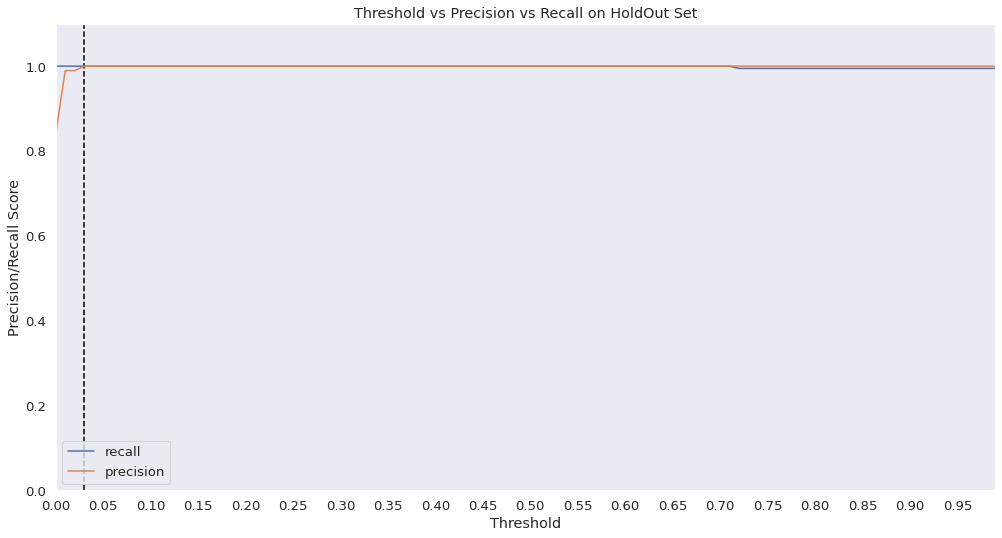

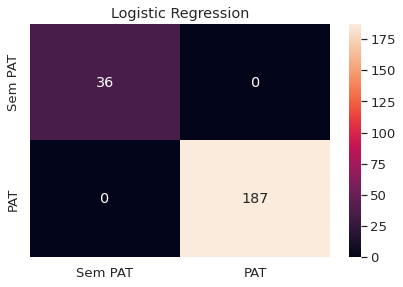

In [84]:
#names = ['Extra Trees']
names = ['Logistic Regression']

#classifiers = [DecisionTreeClassifier(max_depth=5)]
#classifiers = [ExtraTreesClassifier(n_estimators=100, min_samples_split=2)]
classifiers = [LogisticRegression()] 

def evaluate_model(X_train, y_train, model,name):

    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    #imba_pipeline = make_pipeline(SMOTE('auto',k_neighbors = 2, random_state = random_seed), model)

    cv_results = cross_val_score(model, X_train, y_train, cv = 3, scoring = 'accuracy')
    clf = model.fit(X_train, y_train)

    preds = clf.predict(X_test)
   
    diff = cv_results.mean() - clf.score(X_test, y_test)
    SD = diff / cv_results.std()
    report = classification_report(y_test, preds,target_names= classes)

    print('Classificador: ',name)
    print(report)
    print(f"Training Score:{clf.score(X_train, y_train)}")
    print(f"Cross V Score: {cv_results.mean()} +/- {cv_results.std()}")
    print(f"Testing Score: {clf.score(X_test, y_test)}")
    print(f"Cross & Test Diff: {diff}")
    print(f"Standard Deviations Away: {SD}")
    print(confusion_matrix(y_test, preds))

    cm = confusion_matrix(y_test,preds)

    #fig = plt.figure(figsize=(25,20)) 
    #_= tree.plot_tree(model, 
    #               feature_names=nome_colunas,  
    #               class_names=classes,
    #               filled=True)

    preds = clf.predict_proba(X_test)

    final_df = pd.DataFrame()
    for i in np.arange(0, 1, 0.01):
      final_df = final_df.append(pd.DataFrame({"cutoff": i, 
                                           "precision": precision_score(y_test, np.where(preds[:, 1] > i, 1, 0)), 
                                           "recall": recall_score(y_test, np.where(preds[:, 1] > i, 1, 0)),
                                           "f1": f1_score(y_test, np.where(preds[:, 1] > i, 1, 0))}, index = [0]))

    final_df.set_index("cutoff", inplace = True)
    final_df['error'] = abs(final_df['precision'] - final_df['recall'])
    cutoff_point = final_df[final_df['error'] == final_df['error'].min()].index[0]
    print('Cutoff Point: ', cutoff_point)

    ax = final_df.plot(y = ["recall", "precision"], figsize = (15, 8))
    plt.vlines(cutoff_point, 0, 1.1, linestyles = 'dashed', colors = 'black')
    ax.set_xticks(np.arange(0, 1, 0.05))
    ax.set_xlim(0, 0.99)
    ax.set_ylim(0, 1.1)
    ax.set_title("Threshold vs Precision vs Recall on HoldOut Set")
    ax.set_ylabel("Precision/Recall Score")
    ax.set_xlabel("Threshold")
    ax.grid()



           
    return cm

for name, model in zip(names, classifiers):
    
    #evaluate_model(X_train, y_train, model,name) 
    print('Classificador: ',name)
    (cm)= evaluate_model(X_train, y_train, model,name) 
    sns.set(font_scale=1.2)
    plt.figure(figsize=(6,4))
    plt.title(name)
    df_cm = pd.DataFrame(cm, index=classes, columns=classes)
    cmatrix=sns.heatmap(df_cm,annot=True,fmt='d')
    figure = cmatrix.get_figure() 
    nome_da_figura = '/content/drive/MyDrive/Projeto Eddy Current/Artigo/'+name+'_cmatrix.pdf'   
    figure.savefig(nome_da_figura, dpi=400)
    #score = clf.score(X_test, y_test)
    #scores.append(score)

###Salva Modelo N-0

In [85]:
filename = 'modelo_n_0.sav'
pickle.dump(model, open('/content/drive/MyDrive/Projetos/Projeto Inteligencia Vagoes/Modelos/modelo_n_0', 'wb'))

##Predições com Sktime

###Seleciona Vagões para amostras D-10 D-30 D-50 D-60

In [8]:
df3_filtrado = pd.read_csv('/content/drive/MyDrive/Projetos/Projeto Inteligencia Vagoes/BD_Fase_2/df3_filtrado.csv')
df_inst_red = pd.read_csv('/content/drive/MyDrive/Projetos/Projeto Inteligencia Vagoes/BD_Fase_2/df_inst_red.csv')

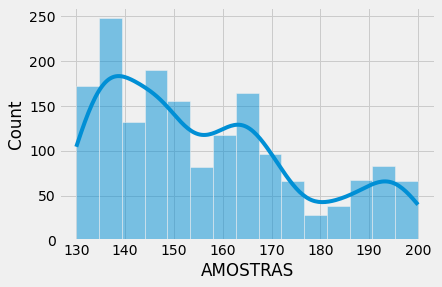

In [12]:
## df_inst
sns.histplot(data=df3_filtrado, x="AMOSTRAS",kde=True)

###D-10

In [13]:
filtro = df3_filtrado[(df3_filtrado['AMOSTRAS']>189)&(df3_filtrado['AMOSTRAS']<191)]
filtro['VAGAO'].unique()

array([733932, 733929, 733930, 732805, 732806, 731481, 734784])

In [14]:
vagao_190 = filtro[(filtro['VAGAO']==733932)]
vagao_190

,VAGAO,EIXO,LADO,AMOSTRAS
74,733932,2.0,L,190
75,733932,2.0,R,190


In [75]:
### D-10  ###

db_190 = df_inst_red[(df_inst_red['VAGAO']==733932)&(df_inst_red['LADO']=='L')&(df_inst_red['EIXO']== 2)]
db_190['date']=0
db_190['date'] = pd.to_datetime(db_190['date'])
db_190.reset_index(drop=True, inplace=True)
for i in range(0,(len(db_190))):
  db_190.at[i,'date']= db_190.iloc[i]['date']+ timedelta(days=i)
db_190 = db_190[['date','ERSDB','FALHA_ROLAMENTO']]
le = LabelEncoder()
db_190['FALHA_ROLAMENTO'] = le.fit_transform(db_190['FALHA_ROLAMENTO'])
db_190.head()
db_190['date'] = db_190['date'].dt.to_period('D')

db_190_ersdb = db_190[['date','ERSDB']]
db_190_ersdb_final = db_190[['date','ERSDB']]
db_190_f_rolam = db_190[['date','FALHA_ROLAMENTO']]
db_190_f_rolam_final = db_190[['date','FALHA_ROLAMENTO']]

colunas_ersdb = ['date','ERSDB']
df = pd.DataFrame(columns=colunas_ersdb)
for x in range(0,10):
  df = df.append({'date':(db_190.iloc[(len(db_190)-1)]['date']+ timedelta(days=(x+1))), 'ERSDB':50}, ignore_index=True)
db_190_ersdb = db_190_ersdb.append(df) 
db_190_ersdb.reset_index(drop=True, inplace=True)
db_190_ersdb = db_190_ersdb.dropna(axis=1, how='all')
#db_190_ersdb_final = db_190_ersdb

colunas_f_rolam = ['date','FALHA_ROLAMENTO']
df = pd.DataFrame(columns=colunas_f_rolam)
for x in range(0,10):
  df = df.append({'date':(db_190.iloc[(len(db_190)-1)]['date']+ timedelta(days=(x+1))), 'FALHA_ROLAMENTO':10}, ignore_index=True)
db_190_f_rolam = db_190_f_rolam.append(df) 
db_190_f_rolam.reset_index(drop=True, inplace=True)
db_190_f_rolam = db_190_f_rolam.dropna(axis=1, how='all')
#db_190_f_rolam_final = db_190_f_rolam


db_190=db_190.set_index('date') ## dataset com ERSDB e FALHA_ROLAMENTO

db_190_ersdb=db_190_ersdb.set_index('date') ## dataset extendido para previsões temporais - ERSDB
db_190_ersdb_final=db_190_ersdb_final.set_index('date') ## dataset a ter a previsão incluída - ERSDB

db_190_f_rolam=db_190_f_rolam.set_index('date') ## dataset extendido para previsões temporais - FALHA_ROLAMENTO
db_190_f_rolam_final=db_190_f_rolam_final.set_index('date') ## dataset a ter a previsão incluída - FALHA_ROLAMENTO

db_190_ersdb["ERSDB"] = db_190_ersdb["ERSDB"].astype(str).astype(int)
db_190_f_rolam["FALHA_ROLAMENTO"] = db_190_f_rolam["FALHA_ROLAMENTO"].astype(str).astype(int)
db_190_ersdb_final["ERSDB"] = db_190_ersdb_final["ERSDB"].astype(str).astype(int)
db_190_f_rolam_final["FALHA_ROLAMENTO"] = db_190_f_rolam_final["FALHA_ROLAMENTO"].astype(str).astype(int)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [143]:
db_190_ersdb

,ERSDB
1970-01-01,54
1970-01-02,58
1970-01-03,61
1970-01-04,57
1970-01-05,60
...,...
1970-07-15,50
1970-07-16,50
1970-07-17,50
1970-07-18,50


###D-30

In [15]:
filtro_2 = df3_filtrado[(df3_filtrado['AMOSTRAS']>169)&(df3_filtrado['AMOSTRAS']<171)]
filtro_2['VAGAO'].unique()

array([733178])

In [16]:
vagao_170 = filtro_2[(filtro_2['VAGAO']==733178)]
vagao_170

,VAGAO,EIXO,LADO,AMOSTRAS
372,733178,4.0,L,170
373,733178,4.0,R,170
374,733178,3.0,L,170
375,733178,3.0,R,170
376,733178,2.0,L,170
377,733178,2.0,R,170
378,733178,1.0,L,170
379,733178,1.0,R,170


In [77]:
### D-30  ###

db_170 = df_inst_red[(df_inst_red['VAGAO']==733178)&(df_inst_red['LADO']=='L')&(df_inst_red['EIXO']== 4)]
db_170['date']=0
db_170['date'] = pd.to_datetime(db_170['date'])
db_170.reset_index(drop=True, inplace=True)
for i in range(0,(len(db_170))):
  db_170.at[i,'date']= db_170.iloc[i]['date']+ timedelta(days=i)
db_170 = db_170[['date','ERSDB','FALHA_ROLAMENTO']]
le = LabelEncoder()
db_170['FALHA_ROLAMENTO'] = le.fit_transform(db_170['FALHA_ROLAMENTO'])
db_170.head()
db_170['date'] = db_170['date'].dt.to_period('D')

db_170_ersdb = db_170[['date','ERSDB']]
db_170_ersdb_final = db_170[['date','ERSDB']]
db_170_f_rolam = db_170[['date','FALHA_ROLAMENTO']]
db_170_f_rolam_final = db_170[['date','FALHA_ROLAMENTO']]

colunas_ersdb = ['date','ERSDB']
df = pd.DataFrame(columns=colunas_ersdb)
for x in range(0,10):
  df = df.append({'date':(db_170.iloc[(len(db_170)-1)]['date']+ timedelta(days=(x+1))), 'ERSDB':50}, ignore_index=True)
db_170_ersdb = db_170_ersdb.append(df) 
db_170_ersdb.reset_index(drop=True, inplace=True)
db_170_ersdb = db_170_ersdb.dropna(axis=1, how='all')
#db_170_ersdb_final = db_170_ersdb

colunas_f_rolam = ['date','FALHA_ROLAMENTO']
df = pd.DataFrame(columns=colunas_f_rolam)
for x in range(0,10):
  df = df.append({'date':(db_170.iloc[(len(db_170)-1)]['date']+ timedelta(days=(x+1))), 'FALHA_ROLAMENTO':10}, ignore_index=True)
db_170_f_rolam = db_170_f_rolam.append(df) 
db_170_f_rolam.reset_index(drop=True, inplace=True)
db_170_f_rolam = db_170_f_rolam.dropna(axis=1, how='all')
#db_170_f_rolam_final = db_170_f_rolam


db_170=db_170.set_index('date') ## dataset com ERSDB e FALHA_ROLAMENTO

db_170_ersdb=db_170_ersdb.set_index('date') ## dataset extendido para previsões temporais - ERSDB
db_170_ersdb_final=db_170_ersdb_final.set_index('date') ## dataset a ter a previsão incluída - ERSDB

db_170_f_rolam=db_170_f_rolam.set_index('date') ## dataset extendido para previsões temporais - FALHA_ROLAMENTO
db_170_f_rolam_final=db_170_f_rolam_final.set_index('date') ## dataset a ter a previsão incluída - FALHA_ROLAMENTO

db_170_ersdb["ERSDB"] = db_170_ersdb["ERSDB"].astype(str).astype(int)
db_170_f_rolam["FALHA_ROLAMENTO"] = db_170_f_rolam["FALHA_ROLAMENTO"].astype(str).astype(int)
db_170_ersdb_final["ERSDB"] = db_170_ersdb_final["ERSDB"].astype(str).astype(int)
db_170_f_rolam_final["FALHA_ROLAMENTO"] = db_170_f_rolam_final["FALHA_ROLAMENTO"].astype(str).astype(int)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


###D-50

In [17]:
filtro_3 = df3_filtrado[(df3_filtrado['AMOSTRAS']>149)&(df3_filtrado['AMOSTRAS']<151)]
filtro_3['VAGAO'].unique()

array([733625, 736754, 736753, 613300, 730325, 730326])

In [18]:
vagao_150 = filtro_3[(filtro_3['VAGAO']==736754)]
vagao_150

,VAGAO,EIXO,LADO,AMOSTRAS
1336,736754,4.0,L,150
1337,736754,4.0,R,150
1338,736754,3.0,L,150
1339,736754,3.0,R,150
1340,736754,2.0,L,150
1341,736754,2.0,R,150
1342,736754,1.0,L,150
1343,736754,1.0,R,150


In [78]:
### D-50  ###

db_150 = df_inst_red[(df_inst_red['VAGAO']==736754)&(df_inst_red['LADO']=='L')&(df_inst_red['EIXO']== 4)]
db_150['date']=0
db_150['date'] = pd.to_datetime(db_150['date'])
db_150.reset_index(drop=True, inplace=True)
for i in range(0,(len(db_150))):
  db_150.at[i,'date']= db_150.iloc[i]['date']+ timedelta(days=i)
db_150 = db_150[['date','ERSDB','FALHA_ROLAMENTO']]
le = LabelEncoder()
db_150['FALHA_ROLAMENTO'] = le.fit_transform(db_150['FALHA_ROLAMENTO'])
db_150.head()
db_150['date'] = db_150['date'].dt.to_period('D')

db_150_ersdb = db_150[['date','ERSDB']]
db_150_ersdb_final = db_150[['date','ERSDB']]
db_150_f_rolam = db_150[['date','FALHA_ROLAMENTO']]
db_150_f_rolam_final = db_150[['date','FALHA_ROLAMENTO']]

colunas_ersdb = ['date','ERSDB']
df = pd.DataFrame(columns=colunas_ersdb)
for x in range(0,10):
  df = df.append({'date':(db_150.iloc[(len(db_150)-1)]['date']+ timedelta(days=(x+1))), 'ERSDB':50}, ignore_index=True)
db_150_ersdb = db_150_ersdb.append(df) 
db_150_ersdb.reset_index(drop=True, inplace=True)
db_150_ersdb = db_150_ersdb.dropna(axis=1, how='all')
#db_150_ersdb_final = db_150_ersdb

colunas_f_rolam = ['date','FALHA_ROLAMENTO']
df = pd.DataFrame(columns=colunas_f_rolam)
for x in range(0,10):
  df = df.append({'date':(db_150.iloc[(len(db_150)-1)]['date']+ timedelta(days=(x+1))), 'FALHA_ROLAMENTO':10}, ignore_index=True)
db_150_f_rolam = db_150_f_rolam.append(df) 
db_150_f_rolam.reset_index(drop=True, inplace=True)
db_150_f_rolam = db_150_f_rolam.dropna(axis=1, how='all')
#db_150_f_rolam_final = db_150_f_rolam


db_150=db_150.set_index('date') ## dataset com ERSDB e FALHA_ROLAMENTO

db_150_ersdb=db_150_ersdb.set_index('date') ## dataset extendido para previsões temporais - ERSDB
db_150_ersdb_final=db_150_ersdb_final.set_index('date') ## dataset a ter a previsão incluída - ERSDB

db_150_f_rolam=db_150_f_rolam.set_index('date') ## dataset extendido para previsões temporais - FALHA_ROLAMENTO
db_150_f_rolam_final=db_150_f_rolam_final.set_index('date') ## dataset a ter a previsão incluída - FALHA_ROLAMEMTO

db_150_ersdb["ERSDB"] = db_150_ersdb["ERSDB"].astype(str).astype(int)
db_150_f_rolam["FALHA_ROLAMENTO"] = db_150_f_rolam["FALHA_ROLAMENTO"].astype(str).astype(int)
db_150_ersdb_final["ERSDB"] = db_150_ersdb_final["ERSDB"].astype(str).astype(int)
db_150_f_rolam_final["FALHA_ROLAMENTO"] = db_150_f_rolam_final["FALHA_ROLAMENTO"].astype(str).astype(int)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


###D-60

In [19]:
filtro_4 = df3_filtrado[(df3_filtrado['AMOSTRAS']>139)&(df3_filtrado['AMOSTRAS']<141)]
filtro_4['VAGAO'].unique()

array([732911, 732912, 735709, 735688,  27116,  27115, 733266, 732847,
       734773, 731121, 731122, 731104])

In [20]:
vagao_140 = filtro_4[(filtro_4['VAGAO']==732911)]
vagao_140

,VAGAO,EIXO,LADO,AMOSTRAS
18,732911,4.0,L,140
19,732911,4.0,R,140
20,732911,3.0,L,140
21,732911,3.0,R,140
22,732911,2.0,L,140
23,732911,2.0,R,140
24,732911,1.0,L,140
25,732911,1.0,R,140


In [79]:
### D-60  ###

db_140 = df_inst_red[(df_inst_red['VAGAO']==732911)&(df_inst_red['LADO']=='L')&(df_inst_red['EIXO']== 4)]
db_140['date']=0
db_140['date'] = pd.to_datetime(db_140['date'])
db_140.reset_index(drop=True, inplace=True)
for i in range(0,(len(db_140))):
  db_140.at[i,'date']= db_140.iloc[i]['date']+ timedelta(days=i)
db_140 = db_140[['date','ERSDB','FALHA_ROLAMENTO']]
le = LabelEncoder()
db_140['FALHA_ROLAMENTO'] = le.fit_transform(db_140['FALHA_ROLAMENTO'])
db_140.head()
db_140['date'] = db_140['date'].dt.to_period('D')

db_140_ersdb = db_140[['date','ERSDB']]
db_140_ersdb_final = db_140[['date','ERSDB']]
db_140_f_rolam = db_140[['date','FALHA_ROLAMENTO']]
db_140_f_rolam_final = db_140[['date','FALHA_ROLAMENTO']]

colunas_ersdb = ['date','ERSDB']
df = pd.DataFrame(columns=colunas_ersdb)
for x in range(0,10):
  df = df.append({'date':(db_140.iloc[(len(db_140)-1)]['date']+ timedelta(days=(x+1))), 'ERSDB':50}, ignore_index=True)
db_140_ersdb = db_140_ersdb.append(df) 
db_140_ersdb.reset_index(drop=True, inplace=True)
db_140_ersdb = db_140_ersdb.dropna(axis=1, how='all')
#db_140_ersdb_final = db_140_ersdb

colunas_f_rolam = ['date','FALHA_ROLAMENTO']
df = pd.DataFrame(columns=colunas_f_rolam)
for x in range(0,10):
  df = df.append({'date':(db_140.iloc[(len(db_140)-1)]['date']+ timedelta(days=(x+1))), 'FALHA_ROLAMENTO':10}, ignore_index=True)
db_140_f_rolam = db_140_f_rolam.append(df) 
db_140_f_rolam.reset_index(drop=True, inplace=True)
db_140_f_rolam = db_140_f_rolam.dropna(axis=1, how='all')
#db_140_f_rolam_final = db_140_f_rolam


db_140=db_140.set_index('date') ## dataset com ERSDB e FALHA_ROLAMENTO

db_140_ersdb=db_140_ersdb.set_index('date') ## dataset extendido para previsões temporais - ERSDB
db_140_ersdb_final=db_140_ersdb_final.set_index('date') ## dataset a ter a previsão incluída - ERSDB

db_140_f_rolam=db_140_f_rolam.set_index('date') ## dataset extendido para previsões temporais - FALHA_ROLAMENTO
db_140_f_rolam_final=db_140_f_rolam_final.set_index('date') ## dataset a ter a previsão incluída - FALHA_ROLAMEMTO

db_140_ersdb["ERSDB"] = db_140_ersdb["ERSDB"].astype(str).astype(int)
db_140_f_rolam["FALHA_ROLAMENTO"] = db_140_f_rolam["FALHA_ROLAMENTO"].astype(str).astype(int)
db_140_ersdb_final["ERSDB"] = db_140_ersdb_final["ERSDB"].astype(str).astype(int)
db_140_f_rolam_final["FALHA_ROLAMENTO"] = db_140_f_rolam_final["FALHA_ROLAMENTO"].astype(str).astype(int)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation

###D-0

In [23]:
filtro_5 = df3_filtrado[(df3_filtrado['AMOSTRAS']>199)&(df3_filtrado['AMOSTRAS']<201)]
filtro_5['VAGAO'].unique()

array([729042, 729855, 613028, 612739, 734441, 734442])

In [24]:
vagao_200 = filtro_5[(filtro_5['VAGAO']==729042)]
vagao_200

,VAGAO,EIXO,LADO,AMOSTRAS
256,729042,4.0,L,200
257,729042,4.0,R,200
258,729042,3.0,L,200
259,729042,3.0,R,200
260,729042,2.0,L,200
261,729042,2.0,R,200


In [80]:
### D-0  ###

db_200 = df_inst_red[(df_inst_red['VAGAO']==729042)&(df_inst_red['LADO']=='L')&(df_inst_red['EIXO']== 4)]
db_200['date']=0
db_200['date'] = pd.to_datetime(db_200['date'])
db_200.reset_index(drop=True, inplace=True)
for i in range(0,(len(db_200))):
  db_200.at[i,'date']= db_200.iloc[i]['date']+ timedelta(days=i)
db_200 = db_200[['date','ERSDB','FALHA_ROLAMENTO']]
le = LabelEncoder()
db_200['FALHA_ROLAMENTO'] = le.fit_transform(db_200['FALHA_ROLAMENTO'])
db_200.head()
db_200['date'] = db_200['date'].dt.to_period('D')

db_200_ersdb = db_200[['date','ERSDB']]
db_200_ersdb_final = db_200[['date','ERSDB']]
db_200_f_rolam = db_200[['date','FALHA_ROLAMENTO']]
db_200_f_rolam_final = db_200[['date','FALHA_ROLAMENTO']]

colunas_ersdb = ['date','ERSDB']
df = pd.DataFrame(columns=colunas_ersdb)
for x in range(0,10):
  df = df.append({'date':(db_200.iloc[(len(db_200)-1)]['date']+ timedelta(days=(x+1))), 'ERSDB':50}, ignore_index=True)
db_200_ersdb = db_200_ersdb.append(df) 
db_200_ersdb.reset_index(drop=True, inplace=True)
db_200_ersdb = db_200_ersdb.dropna(axis=1, how='all')
#db_200_ersdb_final = db_200_ersdb

colunas_f_rolam = ['date','FALHA_ROLAMENTO']
df = pd.DataFrame(columns=colunas_f_rolam)
for x in range(0,10):
  df = df.append({'date':(db_200.iloc[(len(db_200)-1)]['date']+ timedelta(days=(x+1))), 'FALHA_ROLAMENTO':10}, ignore_index=True)
db_200_f_rolam = db_200_f_rolam.append(df) 
db_200_f_rolam.reset_index(drop=True, inplace=True)
db_200_f_rolam = db_200_f_rolam.dropna(axis=1, how='all')
#db_200_f_rolam_final = db_200_f_rolam


db_200=db_200.set_index('date') ## dataset com ERSDB e FALHA_ROLAMENTO

db_200_ersdb=db_200_ersdb.set_index('date') ## dataset extendido para previsões temporais - ERSDB
db_200_ersdb_final=db_200_ersdb_final.set_index('date') ## dataset a ter a previsão incluída - ERSDB

db_200_f_rolam=db_200_f_rolam.set_index('date') ## dataset extendido para previsões temporais - FALHA_ROLAMENTO
db_200_f_rolam_final=db_200_f_rolam_final.set_index('date') ## dataset a ter a previsão incluída - FALHA_ROLAMEMTO

db_200_ersdb["ERSDB"] = db_200_ersdb["ERSDB"].astype(str).astype(int)
db_200_f_rolam["FALHA_ROLAMENTO"] = db_200_f_rolam["FALHA_ROLAMENTO"].astype(str).astype(int)
db_200_ersdb_final["ERSDB"] = db_200_ersdb_final["ERSDB"].astype(str).astype(int)
db_200_f_rolam_final["FALHA_ROLAMENTO"] = db_200_f_rolam_final["FALHA_ROLAMENTO"].astype(str).astype(int)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation

###Forecasting

In [136]:
def forecasting (file,file_final,test_size):  
    
    frase = file
    palavra = 'ERSDB'
    if palavra not in frase:
      coluna = 'FALHA_ROLAMENTO'
    else:
      coluna = 'ERSDB'

    #plot_series(file)
    y_train, y_test = temporal_train_test_split(file, test_size=test_size)
    fh = ForecastingHorizon(y_test.index, is_relative=False)
    regressor = KNeighborsRegressor(n_neighbors=3)
    forecaster = make_reduction(regressor, strategy="recursive", window_length=12)
    forecaster.fit(y_train, fh=fh)
    y_pred = forecaster.predict()
    #plot_series(y_train, y_pred, labels=["y_train","y_pred"])
    resultado = pd.concat([file_final, y_pred], axis=0)

    return resultado

###Dataset D-10 - Predição

In [137]:
y_ersdb_190 = forecasting(db_190_ersdb,db_190_ersdb_final,10)
y_fr_190 = forecasting(db_190_f_rolam,db_190_f_rolam_final,10)
ersdb=y_ersdb_190.T
ersdb.reset_index(drop=True, inplace=True)
fr=y_fr_190.T
fr.reset_index(drop=True, inplace=True)
df_res_190_for = pd.concat([ersdb,fr],axis = 1)

db_190_ersdb_final.reset_index(drop=True, inplace=True)
db_190_f_rolam_final.reset_index(drop=True, inplace=True)
a=db_190_ersdb_final.T
b=db_190_f_rolam_final.T
a.reset_index(drop=True, inplace=True)
b.reset_index(drop=True, inplace=True)
df_res_190 = pd.concat([a,b],axis = 1)

###Dataset D-30 - Predição

In [156]:
y_ersdb_170 = forecasting(db_170_ersdb,db_170_ersdb_final,20)
y_fr_170 = forecasting(db_170_f_rolam,db_170_f_rolam_final,20)
ersdb=y_ersdb_170.T
ersdb.reset_index(drop=True, inplace=True)
fr=y_fr_170.T
fr.reset_index(drop=True, inplace=True)
df_res_170_for = pd.concat([ersdb,fr],axis = 1)

db_170_ersdb_final.reset_index(drop=True, inplace=True)
db_170_f_rolam_final.reset_index(drop=True, inplace=True)
a=db_170_ersdb_final.T
b=db_170_f_rolam_final.T
a.reset_index(drop=True, inplace=True)
b.reset_index(drop=True, inplace=True)
df_res_170 = pd.concat([a,b],axis = 1)

###Dataset D-50 - Predição

In [157]:
y_ersdb_150 = forecasting(db_150_ersdb,db_150_ersdb_final,20)
y_fr_150 = forecasting(db_150_f_rolam,db_150_f_rolam_final,20)
ersdb=y_ersdb_150.T
ersdb.reset_index(drop=True, inplace=True)
fr=y_fr_150.T
fr.reset_index(drop=True, inplace=True)
df_res_150_for = pd.concat([ersdb,fr],axis = 1)

db_150_ersdb_final.reset_index(drop=True, inplace=True)
db_150_f_rolam_final.reset_index(drop=True, inplace=True)
a=db_150_ersdb_final.T
b=db_150_f_rolam_final.T
a.reset_index(drop=True, inplace=True)
b.reset_index(drop=True, inplace=True)
df_res_150 = pd.concat([a,b],axis = 1)

###Dataset D-60 - Predição

In [140]:
y_ersdb_140 = forecasting(db_140_ersdb,db_140_ersdb_final,10)
y_fr_140 = forecasting(db_190_f_rolam,db_140_f_rolam_final,10)
ersdb=y_ersdb_140.T
ersdb.reset_index(drop=True, inplace=True)
fr=y_fr_140.T
fr.reset_index(drop=True, inplace=True)
df_res_140_for = pd.concat([ersdb,fr],axis = 1)

db_140_ersdb_final.reset_index(drop=True, inplace=True)
db_140_f_rolam_final.reset_index(drop=True, inplace=True)
a=db_140_ersdb_final.T
b=db_140_f_rolam_final.T
a.reset_index(drop=True, inplace=True)
b.reset_index(drop=True, inplace=True)
df_res_140 = pd.concat([a,b],axis = 1)

###Dataset D-0 - Predição

In [141]:
y_ersdb_200 = forecasting(db_200_ersdb,db_200_ersdb_final,10)
y_fr_200 = forecasting(db_200_f_rolam,db_200_f_rolam_final,10)
ersdb=y_ersdb_200.T
ersdb.reset_index(drop=True, inplace=True)
fr=y_fr_200.T
fr.reset_index(drop=True, inplace=True)
df_res_200_for = pd.concat([ersdb,fr],axis = 1)

db_200_ersdb_final.reset_index(drop=True, inplace=True)
db_200_f_rolam_final.reset_index(drop=True, inplace=True)
a=db_200_ersdb_final.T
b=db_200_f_rolam_final.T
a.reset_index(drop=True, inplace=True)
b.reset_index(drop=True, inplace=True)
df_res_200 = pd.concat([a,b],axis = 1)

###Grava Datasets para Predição

In [158]:
df_res_190.to_csv ("/content/drive/MyDrive/Projetos/Projeto Inteligencia Vagoes/BD_Fase_2/df_res_190.csv",index = None,header=True)
df_res_190_for.to_csv ("/content/drive/MyDrive/Projetos/Projeto Inteligencia Vagoes/BD_Fase_2/df_res_190_for.csv",index = None,header=True)
df_res_170.to_csv ("/content/drive/MyDrive/Projetos/Projeto Inteligencia Vagoes/BD_Fase_2/f_res_170.csv",index = None,header=True)
df_res_170_for.to_csv ("/content/drive/MyDrive/Projetos/Projeto Inteligencia Vagoes/BD_Fase_2/df_res_170_for.csv",index = None,header=True)
df_res_150.to_csv ("/content/drive/MyDrive/Projetos/Projeto Inteligencia Vagoes/BD_Fase_2/df_res_150.csv",index = None,header=True)
df_res_150_for.to_csv ("/content/drive/MyDrive/Projetos/Projeto Inteligencia Vagoes/BD_Fase_2/df_res_150_for.csv",index = None,header=True)
df_res_140.to_csv ("/content/drive/MyDrive/Projetos/Projeto Inteligencia Vagoes/BD_Fase_2/df_res_140.csv",index = None,header=True)
df_res_140_for.to_csv ("/content/drive/MyDrive/Projetos/Projeto Inteligencia Vagoes/BD_Fase_2/df_res_140_for.csv",index = None,header=True)
df_res_200.to_csv ("/content/drive/MyDrive/Projetos/Projeto Inteligencia Vagoes/BD_Fase_2/df_res_200.csv",index = None,header=True)
df_res_200_for.to_csv ("/content/drive/MyDrive/Projetos/Projeto Inteligencia Vagoes/BD_Fase_2/df_res_200_for.csv",index = None,header=True)

###Forecasting gráfico

In [161]:
def forecasting_graf (file,file_final,test_size):  
    
    frase = file
    palavra = 'ERSDB'
    if palavra not in frase:
      coluna = 'FALHA_ROLAMENTO'
    else:
      coluna = 'ERSDB'

    plot_series(file)
    y_train, y_test = temporal_train_test_split(file, test_size=test_size)
    fh = ForecastingHorizon(y_test.index, is_relative=False)
    regressor = KNeighborsRegressor(n_neighbors=3)
    forecaster = make_reduction(regressor, strategy="recursive", window_length=12)
    forecaster.fit(y_train, fh=fh)
    y_pred = forecaster.predict()
    plot_series(y_train, y_pred, labels=["y_train","y_pred"])
    resultado = pd.concat([file_final, y_pred], axis=0)

    return resultado

,ERSDB
0,56.000000
1,53.000000
2,53.000000
3,50.000000
4,54.000000
...,...
1970-06-25,57.666667
1970-06-26,55.000000
1970-06-27,54.000000
1970-06-28,56.666667


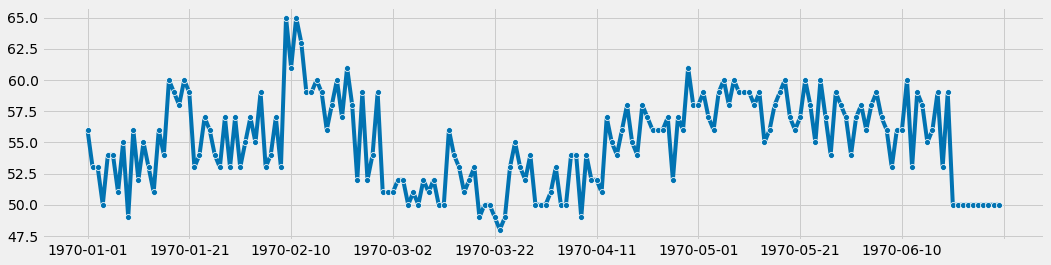

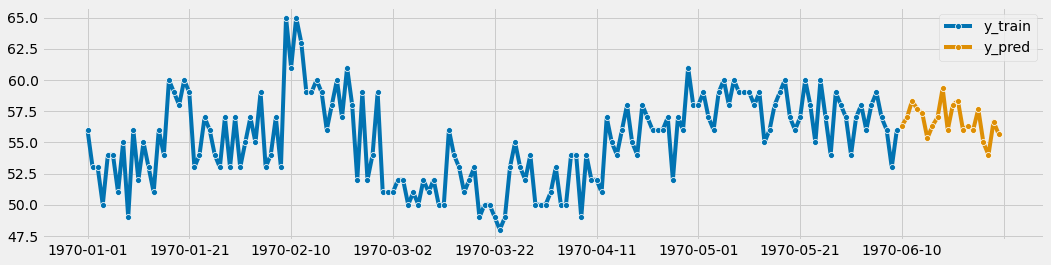

In [163]:
forecasting_graf(db_170_ersdb,db_170_ersdb_final,20)

,FALHA_ROLAMENTO
0,0.000000
1,0.000000
2,0.000000
3,0.000000
4,0.000000
...,...
1970-06-25,2.666667
1970-06-26,1.333333
1970-06-27,1.333333
1970-06-28,1.333333


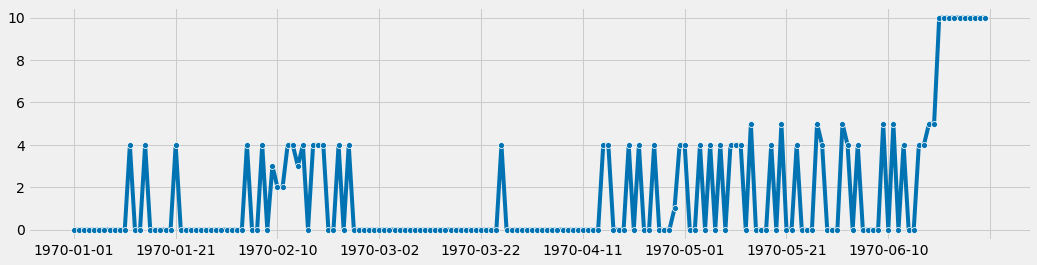

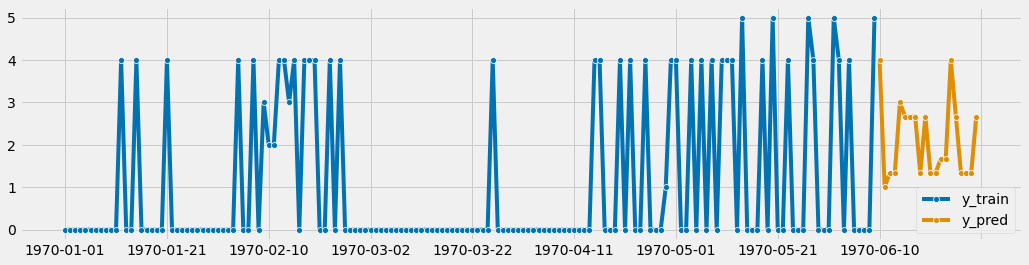

In [162]:
forecasting_graf(db_170_f_rolam,db_170_f_rolam_final,20)

,ERSDB
0,54.000000
1,65.000000
2,58.000000
3,66.000000
4,62.000000
...,...
1970-06-05,61.666667
1970-06-06,60.666667
1970-06-07,62.333333
1970-06-08,61.666667


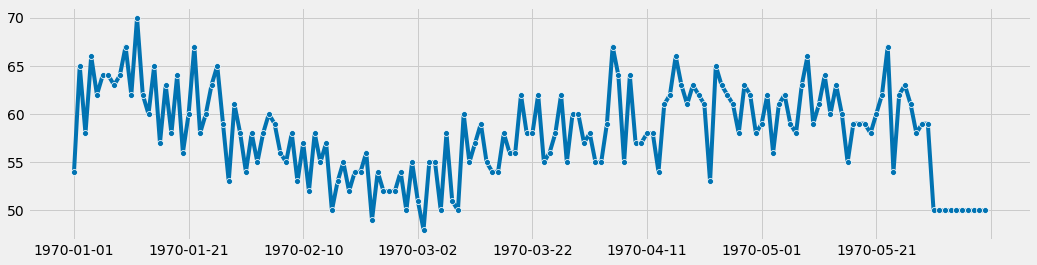

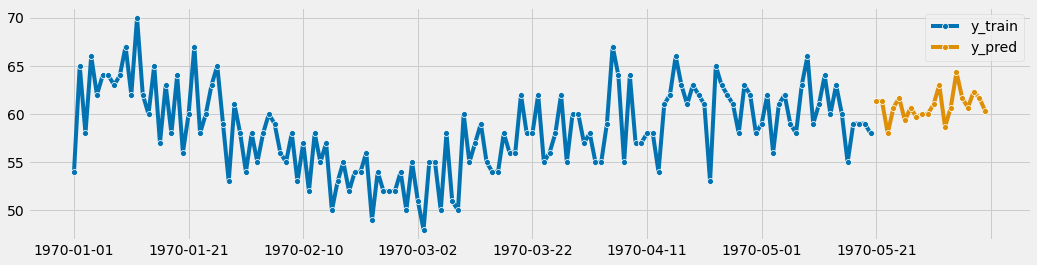

In [164]:
forecasting_graf(db_150_ersdb,db_150_ersdb_final,20)

,FALHA_ROLAMENTO
0,6.0
1,5.0
2,0.0
3,5.0
4,6.0
...,...
1970-06-05,4.0
1970-06-06,4.0
1970-06-07,6.0
1970-06-08,2.0


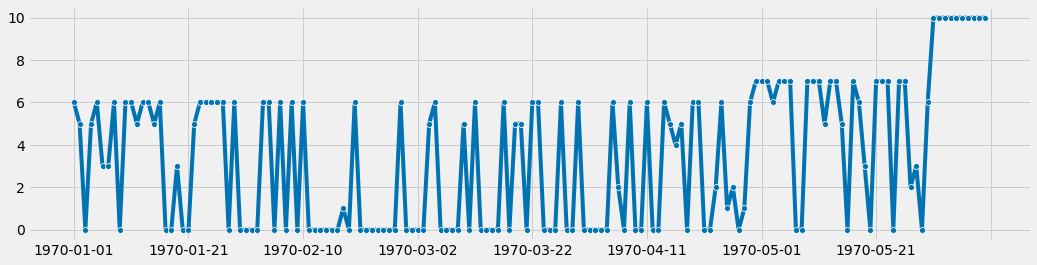

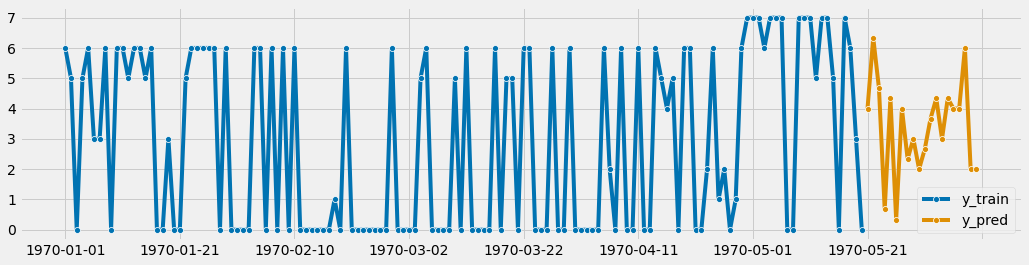

In [165]:
forecasting_graf(db_150_f_rolam,db_150_f_rolam_final,20)

###Faz Predições

In [ ]:
# load the model from disk
loaded_model = pickle.load(open('/content/drive/MyDrive/Projetos/Projeto Perfil Térmico de rodas/Modelos/modelo_p_t_3_smt', 'rb'))
result = loaded_model.score(X_test, y_test)

In [ ]:
preds = model.predict(X_test)
preds

In [ ]:
predicao = pd.DataFrame(preds,columns = ['Resultado'])
teste = pd.DataFrame(X_test)

In [ ]:
for x in range(len(preds)):
  if predicao['Resultado'][x] == 1:
    predicao['Resultado'][x] = "Verdadeiro"
  else:
    predicao['Resultado'][x] = 'Falso'  

In [ ]:
proba = model.predict_proba(X_test)
proba = pd.DataFrame(proba,columns=['Falso(%)','Verdadeiro(%)'])
proba['Falso(%)'] = proba['Falso(%)']*100
proba['Verdadeiro(%)'] = proba['Verdadeiro(%)']*100

In [ ]:
relatorio = pd.concat([teste,predicao,proba], axis=1)

###Rascunhos

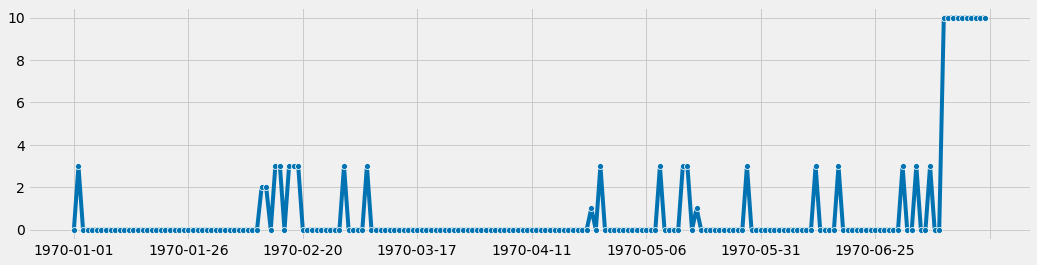

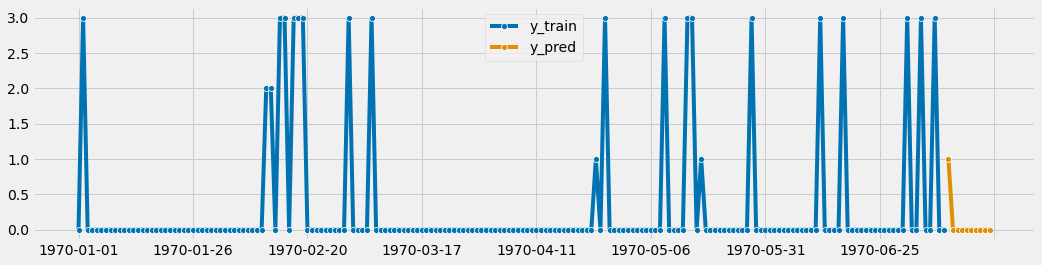

In [85]:
y_fr_190 = forecasting(db_190_f_rolam,db_190_f_rolam_final,10)

In [98]:
ersdb=y_ersdb_190.T

In [99]:
ersdb.reset_index(drop=True, inplace=True)

In [100]:
ersdb

,1970-01-01,1970-01-02,1970-01-03,1970-01-04,1970-01-05,1970-01-06,1970-01-07,1970-01-08,1970-01-09,1970-01-10,...,1970-07-10,1970-07-11,1970-07-12,1970-07-13,1970-07-14,1970-07-15,1970-07-16,1970-07-17,1970-07-18,1970-07-19
0,54.0,58.0,61.0,57.0,60.0,57.0,51.0,48.0,50.0,51.0,...,53.666667,57.0,55.666667,58.0,56.0,56.0,56.333333,54.666667,55.666667,57.0


In [101]:
fr=y_fr_190.T

In [102]:
fr.reset_index(drop=True, inplace=True)

In [103]:
fr

,1970-01-01,1970-01-02,1970-01-03,1970-01-04,1970-01-05,1970-01-06,1970-01-07,1970-01-08,1970-01-09,1970-01-10,...,1970-07-10,1970-07-11,1970-07-12,1970-07-13,1970-07-14,1970-07-15,1970-07-16,1970-07-17,1970-07-18,1970-07-19
0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [106]:
df_res_190 = pd.concat([ersdb,fr],axis = 1)
df_res_190

,1970-01-01,1970-01-02,1970-01-03,1970-01-04,1970-01-05,1970-01-06,1970-01-07,1970-01-08,1970-01-09,1970-01-10,...,1970-07-10,1970-07-11,1970-07-12,1970-07-13,1970-07-14,1970-07-15,1970-07-16,1970-07-17,1970-07-18,1970-07-19
0,54.0,58.0,61.0,57.0,60.0,57.0,51.0,48.0,50.0,51.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [107]:
array = df_res_190.values

In [109]:
array.shape

(1, 400)

In [117]:
db_190_ersdb_final.reset_index(drop=True, inplace=True)
db_190_f_rolam_final.reset_index(drop=True, inplace=True)

In [130]:
a=db_190_ersdb_final.T
b=db_190_f_rolam_final.T
a.reset_index(drop=True, inplace=True)
b.reset_index(drop=True, inplace=True)

In [132]:
b

,0,1,2,3,4,5,6,7,8,9,...,180,181,182,183,184,185,186,187,188,189
0,0,3,0,0,0,0,0,0,0,0,...,0,3,0,0,3,0,0,3,0,0


In [133]:
df_res_190 = pd.concat([a,b],axis = 1)

In [134]:
df_res_190

,0,1,2,3,4,5,6,7,8,9,...,180,181,182,183,184,185,186,187,188,189
0,54,58,61,57,60,57,51,48,50,51,...,0,3,0,0,3,0,0,3,0,0


(<Figure size 1152x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f15c0999050>)

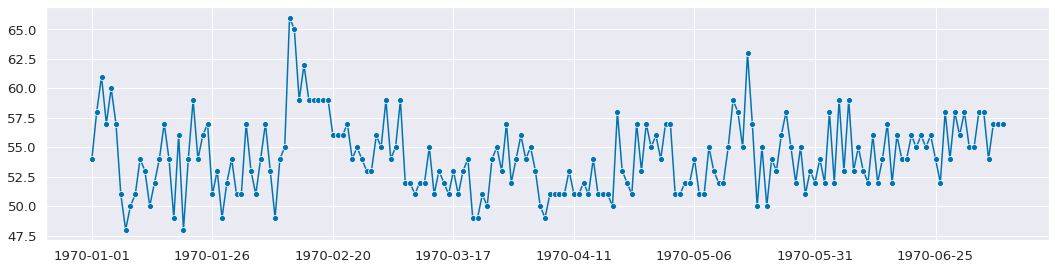

In [139]:
plot_series(file_ersdb)

In [200]:
y_train, y_test = temporal_train_test_split(db_190_2, test_size=10)
fh = ForecastingHorizon(y_test.index, is_relative=False)

In [201]:
fh

ForecastingHorizon(['1970-07-10', '1970-07-11', '1970-07-12', '1970-07-13',
             '1970-07-14', '1970-07-15', '1970-07-16', '1970-07-17',
             '1970-07-18', '1970-07-19'],
            dtype='period[D]', name='date', is_relative=False)

(<Figure size 1152x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f15bee35110>)

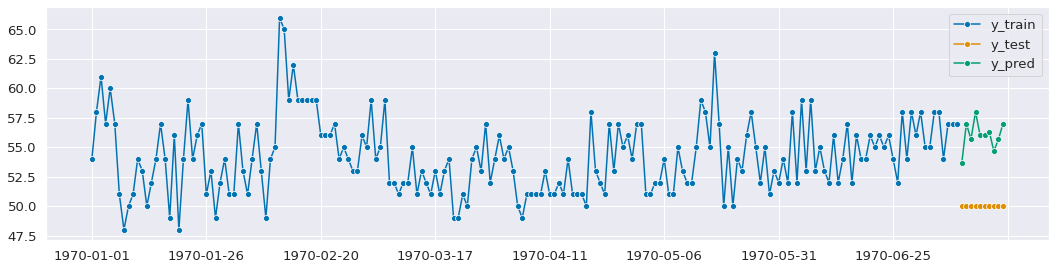

In [202]:
regressor = KNeighborsRegressor(n_neighbors=3)
forecaster = make_reduction(regressor, strategy="recursive", window_length=12)
forecaster.fit(y_train, fh=fh)
#forecaster.fit(db_190_2, fh=fh)
y_pred = forecaster.predict()
plot_series(y_train, y_test, y_pred, labels=["y_train", "y_test", "y_pred"])
#plot_series(db_190_2, y_pred, labels=["db_190_2", "y_pred"])

(<Figure size 1152x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f15bebb0190>)

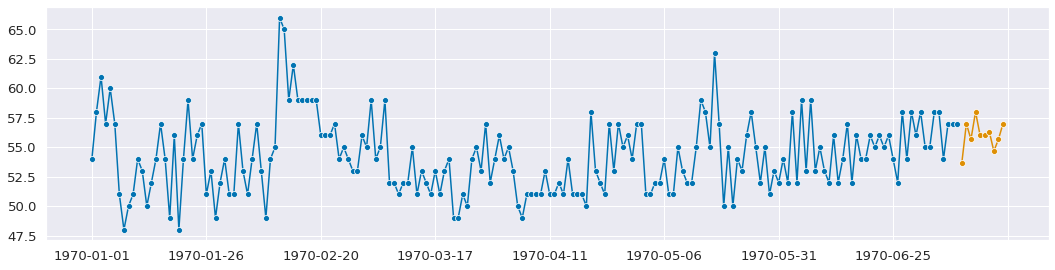

In [203]:
y_pred = forecaster.predict(fh)
plot_series(y_train, y_pred)

In [204]:
fh = ForecastingHorizon(np.arange(10) + 1)
y_train, y_test = temporal_train_test_split(db_190_2, fh=fh)

In [205]:
param_grid = {"window_length": [9, 12, 15], "estimator__n_neighbors": np.arange(1, 10)}

regressor = KNeighborsRegressor()
forecaster = make_reduction(regressor, strategy="recursive")

cv = SlidingWindowSplitter(window_length=60, fh=fh)
gscv = ForecastingGridSearchCV(
    forecaster, cv=cv, param_grid=param_grid, strategy="refit"
)

0.10923758874285647

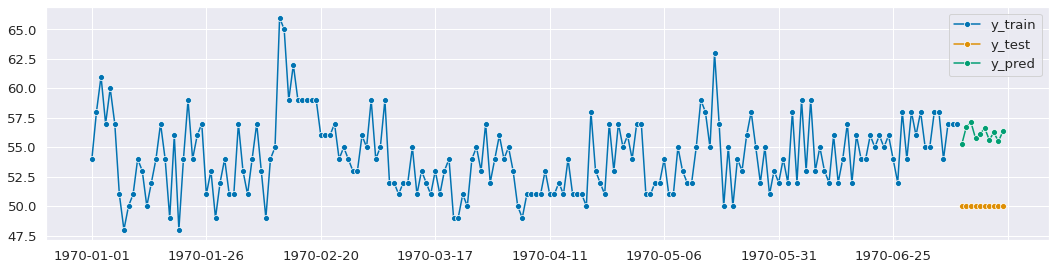

In [206]:
gscv.fit(y_train)
y_pred = gscv.predict(fh)
plot_series(y_train, y_test, y_pred, labels=["y_train", "y_test", "y_pred"])
mean_absolute_percentage_error(y_pred, y_test)

In [207]:
y_pred

,ERSDB
1970-07-10,55.250
1970-07-11,56.750
1970-07-12,57.125
1970-07-13,55.750
1970-07-14,56.125
1970-07-15,56.625
1970-07-16,55.625
1970-07-17,56.250
1970-07-18,55.500
1970-07-19,56.375
